# Loading and merging the datasets:

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

In [2]:
df1 = pd.read_csv('data/RNAseqHarm/dfxROSMAP.csv') 
df2 = pd.read_csv('data/RNAseqHarm/dfxMSBB.csv') 
df3 = pd.read_csv('data/RNAseqHarm/dfxMAYO.csv') 

In [3]:
print(df1['HasAlzheimer'].value_counts())
print(df2['HasAlzheimer'].value_counts())
print(df3['HasAlzheimer'].value_counts())

1.0    984
0.0    834
Name: HasAlzheimer, dtype: int64
0.0    163
1.0     87
Name: HasAlzheimer, dtype: int64
1    80
0    67
Name: HasAlzheimer, dtype: int64


In [4]:
# Get a list of numerical columns
numerical_cols_df1 = df1.select_dtypes(include=[np.number]).columns.tolist()
numerical_cols_df2 = df2.select_dtypes(include=[np.number]).columns.tolist()
numerical_cols_df3 = df3.select_dtypes(include=[np.number]).columns.tolist()

# Remove 'msex', 'sex', and 'HasAlzheimers' from numerical columns list
for cols in [numerical_cols_df1, numerical_cols_df2, numerical_cols_df3]:
    if 'sex' in cols: cols.remove('sex')
    if 'msex' in cols: cols.remove('msex')
    if 'HasAlzheimer' in cols: cols.remove('HasAlzheimer')

# Create the scaler
scaler = StandardScaler()

# Standardize each dataframe before merging
for df, numerical_cols in zip([df1, df2, df3], [numerical_cols_df1, numerical_cols_df2, numerical_cols_df3]):
    df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


In [5]:
print(df1['HasAlzheimer'].value_counts())
print(df2['HasAlzheimer'].value_counts())
print(df3['HasAlzheimer'].value_counts())

1.0    984
0.0    834
Name: HasAlzheimer, dtype: int64
0.0    163
1.0     87
Name: HasAlzheimer, dtype: int64
1    80
0    67
Name: HasAlzheimer, dtype: int64


In [6]:
dfz = pd.concat([df1, df2, df3])

In [7]:
dfz = dfz.rename(columns={'msex':'sex1'})
dfz = dfz.rename(columns={'sex':'sex2'})

In [8]:
dfz.columns

Index(['specimenID', 'tissue', 'sex1', 'apoe_genotype', 'cogdx',
       'HasAlzheimer', 'ID', 'ENSG00000000003', 'ENSG00000000419',
       'ENSG00000000457',
       ...
       'ENSG00000287898', 'ENSG00000287908', 'ENSG00000287963',
       'ENSG00000287975', 'ENSG00000287981', 'ENSG00000287996',
       'ENSG00000288002', 'ENSG00000288060', 'ENSG00000288067',
       'ENSG00000288096'],
      dtype='object', length=24407)

In [9]:
dfz['HasAlzheimer'].value_counts()

1.0    1151
0.0    1064
Name: HasAlzheimer, dtype: int64

In [10]:
sex_columns = dfz.filter(like='sex', axis=1)
print(sex_columns)

     sex1  sex2
0     1.0   NaN
1     0.0   NaN
2     0.0   NaN
3     0.0   NaN
4     1.0   NaN
..    ...   ...
142   NaN   1.0
143   NaN   0.0
144   NaN   0.0
145   NaN   0.0
146   NaN   1.0

[2215 rows x 2 columns]


In [11]:
dfz['sex'] = dfz['sex2'].fillna(dfz['sex1'])

In [12]:
dfe = dfz[['sex','specimenID', 'tissue', 'sex1', 'apoe_genotype', 'cogdx',
       'HasAlzheimer', 'ID']]

In [13]:
dfe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2215 entries, 0 to 146
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   sex            2215 non-null   float64
 1   specimenID     2215 non-null   object 
 2   tissue         2215 non-null   object 
 3   sex1           1818 non-null   float64
 4   apoe_genotype  1818 non-null   float64
 5   cogdx          1818 non-null   float64
 6   HasAlzheimer   2215 non-null   float64
 7   ID             2215 non-null   object 
dtypes: float64(5), object(3)
memory usage: 155.7+ KB


In [14]:
dfz = dfz.dropna(axis=1, how='any')

In [15]:
dfz

specimenID                          tissue  HasAlzheimer          ID  \
0    492_120515  dorsolateral prefrontal cortex           1.0  492_120515   
1     02_120405  dorsolateral prefrontal cortex           1.0   02_120405   
2     03_120405  dorsolateral prefrontal cortex           0.0   03_120405   
3     04_120405  dorsolateral prefrontal cortex           0.0   04_120405   
4     07_120410  dorsolateral prefrontal cortex           0.0   07_120410   
..          ...                             ...           ...         ...   
142     962_TCX                 temporal cortex           1.0     962_TCX   
143     966_TCX                 temporal cortex           1.0     966_TCX   
144     976_TCX                 temporal cortex           1.0     976_TCX   
145     981_TCX                 temporal cortex           1.0     981_TCX   
146     991_TCX                 temporal cortex           1.0     991_TCX   

     ENSG00000000003  ENSG00000000419  ENSG00000000457  ENSG00000000460  \
0          -0.822823        -0.261834         0.367039        -0.232735   
1          -1.538932         1.038598         0.875586         0.729761   
2          -1.805362         0.012117         1.718396         0.232539   
3          -0.231795         0.883396         0.722880         1.551037   
4          -1.931548         0.113907        -0.014981        -3.650395   
..               ...              ...              ...              ...   
142         1.551550        -0.212339         0.165679        -0.167573   
143        -0.457181        -1.781207        -1.456882         0.028861   
144         2.754500        -0.691395         1.575576         0.847431   
145        -0.274543         0.478340         0.796120        -0.027985   
146         0.572510         0.186666        -0.791994        -0.815521   

     ENSG00000000938  ENSG00000000971  ...  ENSG00000287985  ENSG00000288011  \
0          -0.484354        -1.517556  ...         0.378728        -0.077814   
1          -1.043952        -1.278828  ...         0.931840         0.509776   
2          -1.410122        -2.519731  ...         1.465388         1.123928   
3          -0.635919        -0.513086  ...        -0.857878        -0.030459   
4          -0.723660        -1.534571  ...         0.544473        -0.228896   
..               ...              ...  ...              ...              ...   
142         1.369746         0.734537  ...        -0.920832        -0.014401   
143        -0.429900         0.568629  ...        -0.513216        -0.498932   
144         1.230963         1.882273  ...        -0.668166        -2.145474   
145         0.063869         0.981759  ...         0.429157         0.256060   
146        -0.130192         1.079416  ...        -0.835489         0.392763   

     ENSG00000288025  ENSG00000288033  ENSG00000288048  ENSG00000288049  \
0          -0.093656        -0.155878        -0.709228         1.344450   
1           0.541692        -0.540544        -1.586965        -0.655504   
2           0.934536         0.684749        -0.446145        -0.478101   
3           0.549490         0.257154        -0.660144        -0.611364   
4           0.752026         0.703766        -0.249193         1.402110   
..               ...              ...              ...              ...   
142        -1.342048         0.858057         2.418558         0.866873   
143         0.472148         0.601693        -1.466642        -0.898074   
144         0.230940         0.320076         1.082158        -0.598372   
145        -0.257013         0.451900        -1.130322        -0.919928   
146        -0.906683        -0.992459         0.357440         0.948046   

     ENSG00000288062  ENSG00000288075  ENSG00000288107  sex  
0           0.319615         1.253366         0.058202  1.0  
1           0.760866         0.604549        -0.151682  0.0  
2           2.029803        -0.347486         1.604083  0.0  
3          -0.077065        -1.024751        -0.221365  0.0  
4      

# Dimensionality Exploration

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from keras import models
from keras import layers
from sklearn.utils import class_weight
from sklearn.metrics import confusion_matrix
from keras import regularizers
from keras.layers import BatchNormalization
from keras.layers import Dropout
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [17]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from umap import UMAP
import seaborn as sns

/opt/homebrew/Caskroom/miniforge/base/envs/tooters/lib/python3.8/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/opt/homebrew/Caskroom/miniforge/base/envs/tooters/lib/python3.8/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/opt/homebrew/Caskroom/miniforge/base/en

In [18]:
X = dfz.drop(['specimenID', 'HasAlzheimer','ID'], axis=1)  
y = dfz['HasAlzheimer']

categorical_cols = ['tissue']  # Add other categorical column names if needed

# Define numerical columns
numerical_cols = [col for col in X.columns if col not in categorical_cols]

In [19]:
not_floats = X.dtypes[~((X.dtypes == 'float64') | (X.dtypes == 'float32'))]
print(not_floats)


tissue    object
dtype: object


In [20]:
# Preprocessing for numerical data
numerical_transformer = StandardScaler()

# Preprocessing for categorical data
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Define preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Divide data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
X_train_preprocessed = preprocessor.fit_transform(X_train)

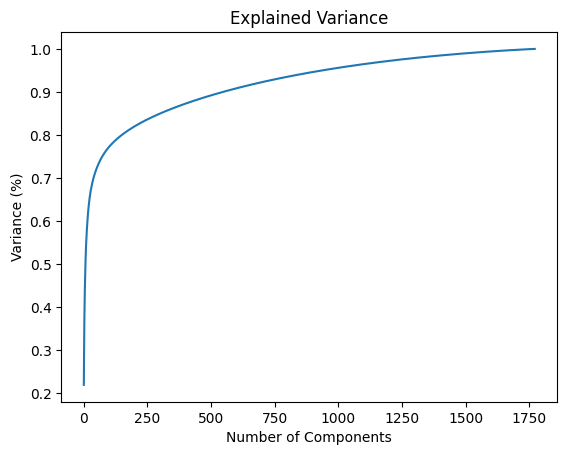

In [22]:
# Fit PCA on your preprocessed data
pca = PCA().fit(X_train_preprocessed)

# Plot the explained variance ratio
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') 
plt.title('Explained Variance')
plt.show()


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
/var/folders/38/8tgmhx7s5t3_6pmj8rgrysmm0000gn/T/ipykernel_67600/1325340069.py:14: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.scatterplot(


<Axes: xlabel='UMAP 1', ylabel='UMAP 2'>

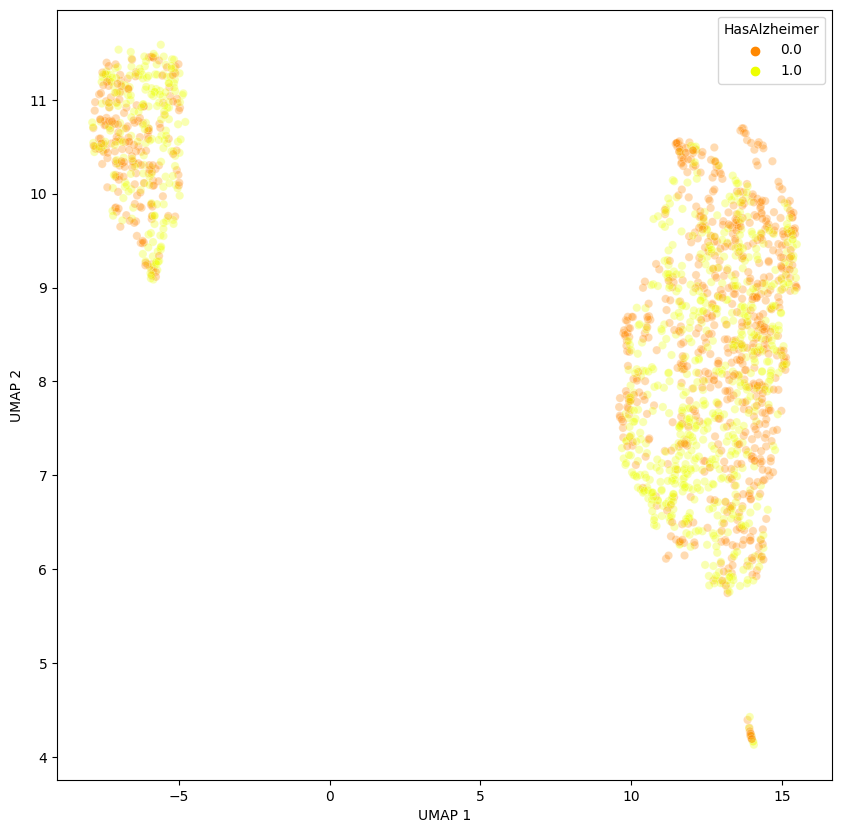

In [23]:
umap = UMAP(n_components=2).fit_transform(preprocessor.transform(X_train))

# Create a DataFrame for visualization
umap_df = pd.DataFrame(data = umap, columns = ['UMAP 1', 'UMAP 2'])

# Create a DataFrame from y_train and reset the index
target_df = y_train.reset_index(drop=True)

# Concatenate umap_df and target_df along the columns axis
umap_df = pd.concat([umap_df, target_df], axis=1)

# Scatterplot
plt.figure(figsize=(10,10))
sns.scatterplot(
    x="UMAP 1", y="UMAP 2",
    hue="HasAlzheimer",
    palette=sns.color_palette("hsv", 10),
    data=umap_df,
    legend="full",
    alpha=0.3)


# Now on to modeling!

In [24]:
# Define the model
model1 = RandomForestClassifier(n_estimators=100, random_state=42)


# Create and evaluate the pipeline
pipe1 = Pipeline(steps=[('preprocessor', preprocessor),
                        ('model', model1)
                       ])

# Fit and predict
pipe1.fit(X_train, y_train)
y_pred1 = pipe1.predict(X_test)

accuracy = accuracy_score(y_test, y_pred1)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 69.98%


In [25]:

print(classification_report(y_test, y_pred1))

print(confusion_matrix(y_test, y_pred1))

              precision    recall  f1-score   support

         0.0       0.66      0.72      0.69       204
         1.0       0.74      0.68      0.71       239

    accuracy                           0.70       443
   macro avg       0.70      0.70      0.70       443
weighted avg       0.70      0.70      0.70       443

[[147  57]
 [ 76 163]]


In [26]:
model2 = LogisticRegression(max_iter=1000)

pipe2 = Pipeline(steps=[('preprocessor', preprocessor),
                        ('model', model2)
                       ])


In [41]:
pipe2.fit(X_train, y_train)
y_pred2 = pipe2.predict(X_test)

accuracy = accuracy_score(y_test, y_pred2)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 87.13%


In [42]:
print(classification_report(y_test, y_pred2))

print(confusion_matrix(y_test, y_pred2))

              precision    recall  f1-score   support

         0.0       0.86      0.86      0.86       204
         1.0       0.88      0.88      0.88       239

    accuracy                           0.87       443
   macro avg       0.87      0.87      0.87       443
weighted avg       0.87      0.87      0.87       443

[[176  28]
 [ 29 210]]


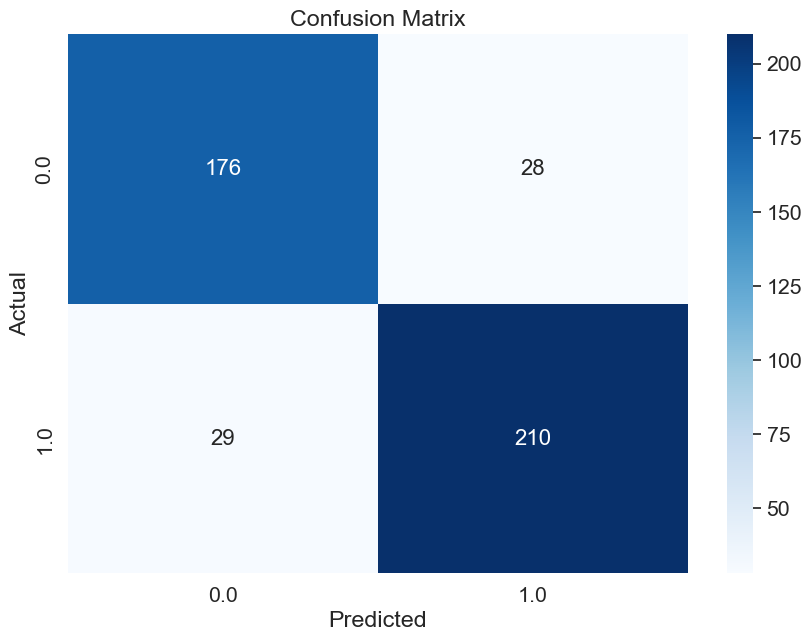

              precision    recall  f1-score   support

         0.0       0.86      0.86      0.86       204
         1.0       0.88      0.88      0.88       239

    accuracy                           0.87       443
   macro avg       0.87      0.87      0.87       443
weighted avg       0.87      0.87      0.87       443



In [44]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import pandas as pd

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred2)

# Create a DataFrame from the confusion matrix
cm_df = pd.DataFrame(cnf_matrix, columns=np.unique(y_test), index = np.unique(y_test))
cm_df.index.name = 'Actual'
cm_df.columns.name = 'Predicted'

# Plot using seaborn
plt.figure(figsize=(10,7))
sns.set(font_scale=1.4)  # for label size
sns.heatmap(cm_df, cmap="Blues", annot=True, annot_kws={"size": 16}, fmt='d')  # font size
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print(classification_report(y_test, y_pred2))


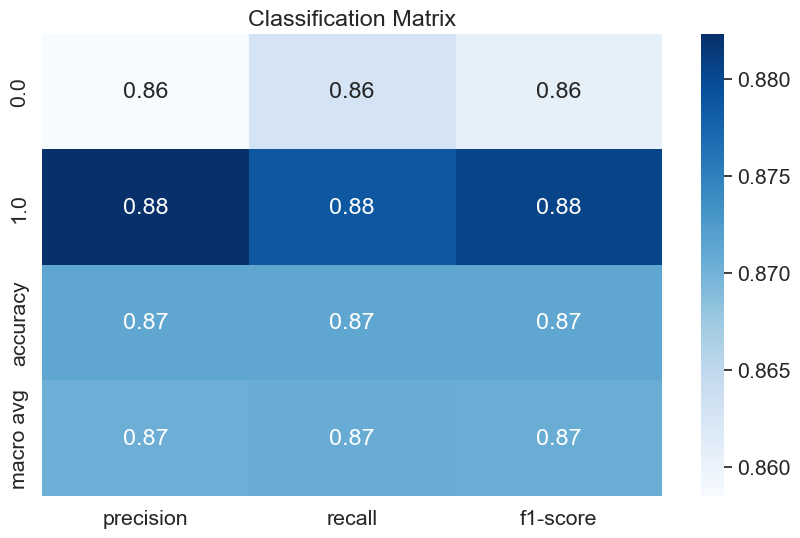

In [47]:
import seaborn as sns
from sklearn.metrics import classification_report
import pandas as pd

# Generate a classification report
report = classification_report(y_test, y_pred2, output_dict=True)

# Convert the report to a DataFrame
report_df = pd.DataFrame(report).transpose()

# Plot the heatmap
plt.figure(figsize=(10, 6))
plt.title('Classification Matrix')
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap='Blues')
plt.show()


AUC: 0.93


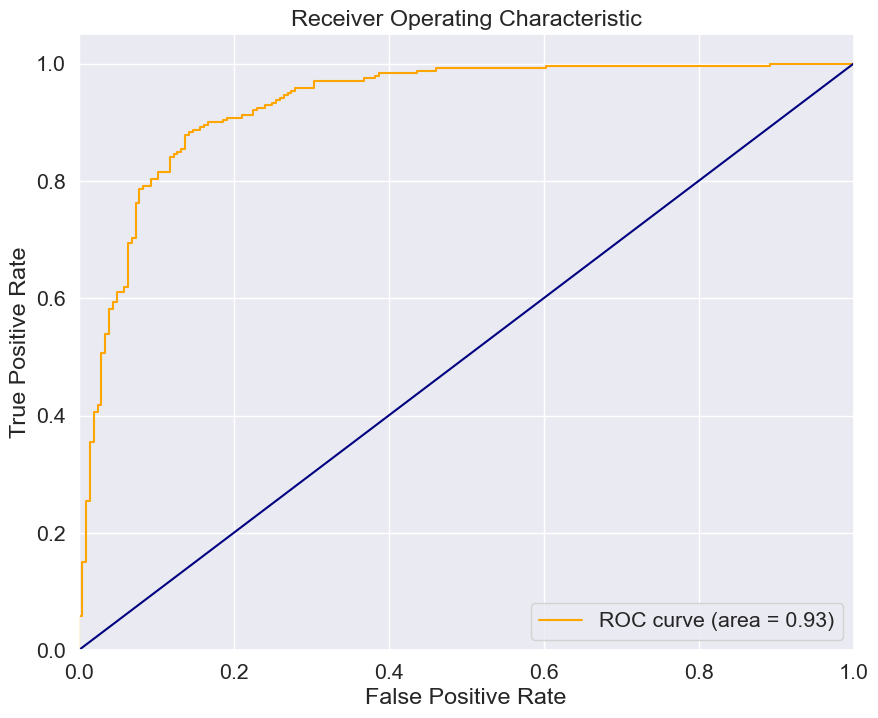

In [56]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Predict probabilities for the test data.
y_pred_probs = pipe2.predict_proba(X_test)[:, 1]

# Compute the ROC curve.
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

# Compute the AUC score.
auc_score = roc_auc_score(y_test, y_pred_probs)
print(f"AUC: {auc_score:.2f}")

# Plot the ROC curve.
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='orange', label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='navy', linestyle='-')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [29]:
model3 = xgb.XGBClassifier()

pipe3 = Pipeline(steps=[('preprocessor', preprocessor),
                        ('model', model3)
                       ])


In [30]:

pipe3.fit(X_train, y_train)
y_pred3 = pipe3.predict(X_test)

accuracy = accuracy_score(y_test, y_pred3)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 76.75%


In [31]:

print(classification_report(y_test, y_pred3))

print(confusion_matrix(y_test, y_pred3))

              precision    recall  f1-score   support

         0.0       0.74      0.76      0.75       204
         1.0       0.79      0.77      0.78       239

    accuracy                           0.77       443
   macro avg       0.77      0.77      0.77       443
weighted avg       0.77      0.77      0.77       443

[[155  49]
 [ 54 185]]


In [32]:
X.shape

(2215, 17004)

In [33]:
from keras import regularizers
from scikeras.wrappers import KerasClassifier

In [182]:
def create_model():
    model4 = models.Sequential()
    model4.add(layers.Dense(512, activation='relu', input_shape=(17012,)))
    model4.add(layers.Dense(256, activation='relu'))
    model4.add(BatchNormalization())
    model4.add(Dropout(0.5))
    model4.add(layers.Dense(128, activation='relu'))
    model4.add(BatchNormalization())
    model4.add(Dropout(0.5))
    model4.add(layers.Dense(1, activation='sigmoid'))

    model4.compile(loss='binary_crossentropy', optimizer="adam", metrics=['acc'])
    return model4


In [183]:
model5 = KerasClassifier(build_fn=create_model, epochs=50, batch_size=10, verbose=2)

In [184]:
pipe5 = Pipeline(steps=[('preprocessor', preprocessor),
                        ('model', model5)
                       ])


In [185]:
pipe5.fit(X_train, y_train)
y_pred5 = pipe5.predict(X_test)

accuracy = accuracy_score(y_test, y_pred5)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


Epoch 1/50


/opt/homebrew/Caskroom/miniforge/base/envs/tooters/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
2023-08-01 13:33:55.143197: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


178/178 - 3s - loss: 0.8302 - acc: 0.5818 - 3s/epoch - 16ms/step
Epoch 2/50
178/178 - 2s - loss: 0.6816 - acc: 0.6467 - 2s/epoch - 10ms/step
Epoch 3/50
178/178 - 2s - loss: 0.6167 - acc: 0.6817 - 2s/epoch - 10ms/step
Epoch 4/50
178/178 - 2s - loss: 0.5625 - acc: 0.7173 - 2s/epoch - 12ms/step
Epoch 5/50
178/178 - 2s - loss: 0.5540 - acc: 0.7393 - 2s/epoch - 11ms/step
Epoch 6/50
178/178 - 2s - loss: 0.5264 - acc: 0.7387 - 2s/epoch - 10ms/step
Epoch 7/50
178/178 - 2s - loss: 0.4700 - acc: 0.7782 - 2s/epoch - 10ms/step
Epoch 8/50
178/178 - 2s - loss: 0.3988 - acc: 0.8070 - 2s/epoch - 10ms/step
Epoch 9/50
178/178 - 2s - loss: 0.3477 - acc: 0.8431 - 2s/epoch - 10ms/step
Epoch 10/50
178/178 - 2s - loss: 0.3431 - acc: 0.8442 - 2s/epoch - 10ms/step
Epoch 11/50
178/178 - 2s - loss: 0.2714 - acc: 0.8877 - 2s/epoch - 11ms/step
Epoch 12/50
178/178 - 2s - loss: 0.2680 - acc: 0.8973 - 2s/epoch - 10ms/step
Epoch 13/50
178/178 - 2s - loss: 0.2180 - acc: 0.9114 - 2s/epoch - 10ms/step
Epoch 14/50
178/178

2023-08-01 13:35:28.909246: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


45/45 - 0s - 314ms/epoch - 7ms/step
Accuracy: 79.91%


# Hypertuning Best Model

In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# Define the parameter grid for logistic regression with penalty
param_grid_with_penalty = {
    'model__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'model__penalty': ['l1', 'l2', 'elasticnet'],
    'model__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

# Define the parameter grid for logistic regression without penalty
param_grid_without_penalty = {
    'model__penalty': [None],
    'model__solver': ['newton-cg', 'lbfgs', 'sag', 'saga']
}

# Create a base model
logreg = LogisticRegression(max_iter=10000)

# Create pipeline
pipe6 = Pipeline(steps=[('preprocessor', preprocessor),
                        ('model', logreg)
                       ])

# Instantiate the grid search model
grid_search_with_penalty = GridSearchCV(estimator=pipe6, param_grid=param_grid_with_penalty, cv=5, n_jobs=-1, verbose=2)
grid_search_without_penalty = GridSearchCV(estimator=pipe6, param_grid=param_grid_without_penalty, cv=5, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search_with_penalty.fit(X_train, y_train)
grid_search_without_penalty.fit(X_train, y_train)

# Check the best parameters found by GridSearchCV
print("Best parameters with penalty:", grid_search_with_penalty.best_params_)
print("Best parameters without penalty:", grid_search_without_penalty.best_params_)

# Check the best scores found by GridSearchCV
print("Best score with penalty:", grid_search_with_penalty.best_score_)
print("Best score without penalty:", grid_search_without_penalty.best_score_)


Fitting 5 folds for each of 105 candidates, totalling 525 fits
[CV] END model__C=0.001, model__penalty=l1, model__solver=newton-cg; total time=   3.2s
[CV] END model__C=0.001, model__penalty=l1, model__solver=sag; total time=   2.5s
[CV] END model__C=0.001, model__penalty=l1, model__solver=saga; total time=   1.8s
[CV] END model__C=0.001, model__penalty=l2, model__solver=lbfgs; total time=   5.1s
[CV] END model__C=0.001, model__penalty=l2, model__solver=liblinear; total time=   7.8s
[CV] END model__C=0.001, model__penalty=l2, model__solver=saga; total time= 3.0min
[CV] END model__C=0.01, model__penalty=l2, model__solver=lbfgs; total time=   5.8s
[CV] END model__C=0.01, model__penalty=l2, model__solver=lbfgs; total time=   4.8s
[CV] END model__C=0.01, model__penalty=l2, model__solver=liblinear; total time=   8.2s
[CV] END model__C=0.01, model__penalty=l2, model__solver=sag; total time= 1.2min
[CV] END model__C=0.01, model__penalty=l2, model__solver=saga; total time= 2.1min
[CV] END mode

/opt/homebrew/Caskroom/miniforge/base/envs/tooters/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END model__C=0.001, model__penalty=l1, model__solver=newton-cg; total time=   3.2s
[CV] END model__C=0.001, model__penalty=l1, model__solver=sag; total time=   2.5s
[CV] END model__C=0.001, model__penalty=l1, model__solver=saga; total time=   1.8s
[CV] END model__C=0.001, model__penalty=l2, model__solver=lbfgs; total time=   5.3s
[CV] END model__C=0.001, model__penalty=l2, model__solver=liblinear; total time=   8.4s
[CV] END model__C=0.001, model__penalty=l2, model__solver=saga; total time= 2.4min
[CV] END model__C=0.01, model__penalty=l2, model__solver=newton-cg; total time=   7.9s
[CV] END model__C=0.01, model__penalty=l2, model__solver=newton-cg; total time=   8.4s
[CV] END model__C=0.01, model__penalty=l2, model__solver=newton-cg; total time=   7.7s
[CV] END model__C=0.01, model__penalty=l2, model__solver=newton-cg; total time=   7.6s
[CV] END model__C=0.01, model__penalty=l2, model__solver=newton-cg; total time=   7.9s
[CV] END model__C=0.01, model__penalty=l2, model__solver=

/opt/homebrew/Caskroom/miniforge/base/envs/tooters/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
280 fits failed out of a total of 525.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniforge/base/envs/tooters/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/tooters/lib/python3.8/site-packages/sklearn/base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/tooters/

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best parameters with penalty: {'model__C': 0.1, 'model__penalty': 'l2', 'model__solver': 'liblinear'}
Best parameters without penalty: {'model__penalty': None, 'model__solver': 'newton-cg'}
Best score with penalty: 0.8369141402084825
Best score without penalty: 0.8363491684570702
[CV] END model__C=10, model__penalty=l2, model__solver=newton-cg; total time=   8.3s
[CV] END model__C=10, model__penalty=l2, model__solver=newton-cg; total time=   8.7s
[CV] END model__C=10, model__penalty=l2, model__solver=lbfgs; total time=   7.6s
[CV] END model__C=10, model__penalty=l2, model__solver=lbfgs; total time=   6.5s
[CV] END model__C=10, model__penalty=l2, model__solver=lbfgs; total time=   6.3s
[CV] END model__C=10, model__penalty=l2, model__solver=lbfgs; total time=   8.0s
[CV] END model__C=10, model__penalty=l2, model__solver=lbfgs; total time=   6.0s
[CV] END model__C=10, model__penalty=l2, model__solver=liblinear; total time=  10.7s

[CV] END .model__C=1, model__penalty=l2, model__solver=lbfgs; total time=   6.3s
[CV] END .model__C=1, model__penalty=l2, model__solver=lbfgs; total time=   6.1s
[CV] END .model__C=1, model__penalty=l2, model__solver=lbfgs; total time=   6.2s
[CV] END .model__C=1, model__penalty=l2, model__solver=lbfgs; total time=   6.4s
[CV] END model__C=1, model__penalty=l2, model__solver=liblinear; total time=   9.8s
[CV] END model__C=1, model__penalty=l2, model__solver=liblinear; total time=   9.2s
[CV] END model__C=1, model__penalty=l2, model__solver=liblinear; total time=   9.9s
[CV] END model__C=1, model__penalty=l2, model__solver=liblinear; total time=   9.9s
[CV] END model__C=1, model__penalty=l2, model__solver=liblinear; total time=  10.0s
[CV] END ...model__C=1, model__penalty=l2, model__solver=sag; total time= 4.0min
[CV] END ..model__C=1, model__penalty=l2, model__solver=saga; total time= 5.1min
[CV] END model__C=1, model__penalty=elasticnet, model__solver=newton-cg; total time=   0.7s
[C

[CV] END model__C=0.001, model__penalty=l1, model__solver=lbfgs; total time=   2.8s
[CV] END model__C=0.001, model__penalty=l1, model__solver=liblinear; total time=   3.2s
[CV] END model__C=0.001, model__penalty=l2, model__solver=newton-cg; total time=  12.2s
[CV] END model__C=0.001, model__penalty=l2, model__solver=sag; total time= 2.1min
[CV] END model__C=0.01, model__penalty=l1, model__solver=saga; total time= 5.3min
[CV] END model__C=0.1, model__penalty=l2, model__solver=newton-cg; total time=   8.0s
[CV] END model__C=0.1, model__penalty=l2, model__solver=newton-cg; total time=   8.7s
[CV] END model__C=0.1, model__penalty=l2, model__solver=newton-cg; total time=   7.8s
[CV] END model__C=0.1, model__penalty=l2, model__solver=lbfgs; total time=   6.4s
[CV] END model__C=0.1, model__penalty=l2, model__solver=liblinear; total time=  11.4s
[CV] END .model__C=0.1, model__penalty=l2, model__solver=sag; total time= 2.8min
[CV] END model__C=0.1, model__penalty=l2, model__solver=saga; total t

In [35]:
# Check the best parameters found by GridSearchCV
print("Best parameters with penalty:", grid_search_with_penalty.best_params_)
print("Best parameters without penalty:", grid_search_without_penalty.best_params_)

# Check the best scores found by GridSearchCV
print("Best score with penalty:", grid_search_with_penalty.best_score_)
print("Best score without penalty:", grid_search_without_penalty.best_score_)


Best parameters with penalty: {'model__C': 0.1, 'model__penalty': 'l2', 'model__solver': 'liblinear'}
Best parameters without penalty: {'model__penalty': None, 'model__solver': 'newton-cg'}
Best score with penalty: 0.8369141402084825
Best score without penalty: 0.8363491684570702


In [36]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# Create a base model with a random state
logreg = LogisticRegression(max_iter=10000, random_state=42)

# Define a distribution for C around the default value
param_distributions = {'model__C': uniform(loc=0.5, scale=1.5),
                       'model__penalty': ['l1', 'l2', 'elasticnet'],
                       'model__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
                      }

# Instantiate the randomized search model
random_search = RandomizedSearchCV(estimator=pipe6, param_distributions=param_distributions, n_iter=100, cv=5, n_jobs=-1, verbose=2, random_state=42)

# Fit the randomized search to the data
random_search.fit(X_train, y_train)

# Check the best parameters found by RandomizedSearchCV
print("Best parameters:", random_search.best_params_)

# Check the best score found by RandomizedSearchCV
print("Best score:", random_search.best_score_)


Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END model__C=1.669536500409154, model__penalty=l1, model__solver=lbfgs; total time=   3.4s
[CV] END model__C=0.7339917805043039, model__penalty=elasticnet, model__solver=liblinear; total time=   4.0s
[CV] END model__C=1.7992642186624028, model__penalty=elasticnet, model__solver=saga; total time=   0.9s
[CV] END model__C=1.9548647782429915, model__penalty=l2, model__solver=lbfgs; total time=   7.6s
[CV] END model__C=1.1479175279631737, model__penalty=l1, model__solver=liblinear; total time=   3.2s
[CV] END model__C=1.4177793420835691, model__penalty=l2, model__solver=sag; total time= 4.1min
[CV] END model__C=1.1757488779543146, model__penalty=l2, model__solver=sag; total time= 4.0min
[CV] END model__C=0.8463407384332235, model__penalty=elasticnet, model__solver=sag; total time=   0.7s
[CV] END model__C=0.6830573522671682, model__penalty=l1, model__solver=liblinear; total time=   2.4s
[CV] END model__C=0.6830573522671682

/opt/homebrew/Caskroom/miniforge/base/envs/tooters/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END model__C=1.669536500409154, model__penalty=l1, model__solver=lbfgs; total time=   3.4s
[CV] END model__C=0.7339917805043039, model__penalty=elasticnet, model__solver=liblinear; total time=   4.0s
[CV] END model__C=1.7992642186624028, model__penalty=elasticnet, model__solver=saga; total time=   0.9s
[CV] END model__C=1.9548647782429915, model__penalty=l2, model__solver=lbfgs; total time=   7.4s
[CV] END model__C=1.1479175279631737, model__penalty=l1, model__solver=liblinear; total time=   3.2s
[CV] END model__C=1.4177793420835691, model__penalty=l2, model__solver=sag; total time= 4.2min
[CV] END model__C=1.1757488779543146, model__penalty=l2, model__solver=sag; total time= 4.1min
[CV] END model__C=1.8639806031181732, model__penalty=l2, model__solver=sag; total time= 4.5min
[CV] END model__C=0.5678409333658071, model__penalty=l1, model__solver=saga; total time=18.5min
[CV] END model__C=1.9649224337489795, model__penalty=l2, model__solver=saga; total time= 5.6min
[CV] END model__

[CV] END model__C=1.0618101782710436, model__penalty=l1, model__solver=liblinear; total time=   8.9s
[CV] END model__C=0.7727374508106509, model__penalty=l1, model__solver=newton-cg; total time=   0.7s
[CV] END model__C=0.9563633644393066, model__penalty=l2, model__solver=saga; total time= 5.7min
[CV] END model__C=1.0781247538098742, model__penalty=l2, model__solver=saga; total time= 4.7min
[CV] END model__C=0.9675666141341164, model__penalty=l2, model__solver=lbfgs; total time=   6.5s
[CV] END model__C=1.3515504917299872, model__penalty=l1, model__solver=lbfgs; total time=   0.7s
[CV] END model__C=1.6626992350416718, model__penalty=l2, model__solver=lbfgs; total time=   8.0s
[CV] END model__C=1.6626992350416718, model__penalty=l2, model__solver=lbfgs; total time=   8.1s
[CV] END model__C=1.8422410256414732, model__penalty=l2, model__solver=sag; total time= 4.5min
[CV] END model__C=1.3418651387715517, model__penalty=elasticnet, model__solver=saga; total time=   0.7s
[CV] END model__C=1

[CV] END model__C=1.0618101782710436, model__penalty=l1, model__solver=liblinear; total time=   8.6s
[CV] END model__C=0.7727374508106509, model__penalty=l1, model__solver=newton-cg; total time=   0.8s
[CV] END model__C=0.9563633644393066, model__penalty=l2, model__solver=saga; total time= 5.2min
[CV] END model__C=1.0781247538098742, model__penalty=l2, model__solver=saga; total time= 5.1min
[CV] END model__C=0.9675666141341164, model__penalty=l2, model__solver=lbfgs; total time=   6.5s
[CV] END model__C=0.9675666141341164, model__penalty=l2, model__solver=lbfgs; total time=   6.6s
[CV] END model__C=1.3515504917299872, model__penalty=l1, model__solver=lbfgs; total time=   0.7s
[CV] END model__C=1.3515504917299872, model__penalty=l1, model__solver=lbfgs; total time=   0.6s
[CV] END model__C=1.3515504917299872, model__penalty=l1, model__solver=lbfgs; total time=   0.7s
[CV] END model__C=1.3515504917299872, model__penalty=l1, model__solver=lbfgs; total time=   0.6s
[CV] END model__C=1.6626

/opt/homebrew/Caskroom/miniforge/base/envs/tooters/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
260 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniforge/base/envs/tooters/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/tooters/lib/python3.8/site-packages/sklearn/base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/tooters/

[CV] END model__C=1.669536500409154, model__penalty=l1, model__solver=lbfgs; total time=   3.4s
[CV] END model__C=0.7339917805043039, model__penalty=elasticnet, model__solver=liblinear; total time=   3.8s
[CV] END model__C=1.7992642186624028, model__penalty=elasticnet, model__solver=saga; total time=   0.9s
[CV] END model__C=1.9548647782429915, model__penalty=l2, model__solver=lbfgs; total time=   9.3s
[CV] END model__C=1.1479175279631737, model__penalty=l1, model__solver=liblinear; total time=   2.7s
[CV] END model__C=1.4177793420835691, model__penalty=l2, model__solver=sag; total time= 3.8min
[CV] END model__C=1.9606332782621887, model__penalty=elasticnet, model__solver=liblinear; total time=   0.7s
[CV] END model__C=1.9606332782621887, model__penalty=elasticnet, model__solver=liblinear; total time=   0.6s
[CV] END model__C=1.9606332782621887, model__penalty=elasticnet, model__solver=liblinear; total time=   0.6s
[CV] END model__C=1.9606332782621887, model__penalty=elasticnet, model_

In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# Define the parameter grid for logistic regression with penalty
param_grid_with_penalty = {
    'model__C': [0.5, 0.75, 1, 1.25, 1.5],
    'model__penalty': ['l2'],
    'model__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}



# Define the parameter grid for logistic regression without penalty
param_grid_without_penalty = {
    'model__C': [0.5, 0.75, 1, 1.25, 1.5],
    'model__penalty': [None],
    'model__solver': ['newton-cg', 'lbfgs', 'sag', 'saga']
}

# Create a base model
logreg = LogisticRegression(max_iter=10000)

# Create pipeline
pipe6 = Pipeline(steps=[('preprocessor', preprocessor),
                        ('model', logreg)
                       ])

# Instantiate the grid search model
grid_search_with_penalty = GridSearchCV(estimator=pipe6, param_grid=param_grid_with_penalty, cv=5, n_jobs=-1, verbose=2)
grid_search_without_penalty = GridSearchCV(estimator=pipe6, param_grid=param_grid_without_penalty, cv=5, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search_with_penalty.fit(X_train, y_train)
grid_search_without_penalty.fit(X_train, y_train)

# Check the best parameters found by GridSearchCV
print("Best parameters with penalty:", grid_search_with_penalty.best_params_)
print("Best parameters without penalty:", grid_search_without_penalty.best_params_)

# Check the best scores found by GridSearchCV
print("Best score with penalty:", grid_search_with_penalty.best_score_)
print("Best score without penalty:", grid_search_without_penalty.best_score_)


Fitting 5 folds for each of 25 candidates, totalling 125 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits


/opt/homebrew/Caskroom/miniforge/base/envs/tooters/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


Best parameters with penalty: {'model__C': 0.5, 'model__penalty': 'l2', 'model__solver': 'liblinear'}
Best parameters without penalty: {'model__C': 0.5, 'model__penalty': None, 'model__solver': 'newton-cg'}
Best score with penalty: 0.8369125487387603
Best score without penalty: 0.8363491684570702
[CV] END model__C=0.5, model__penalty=l2, model__solver=lbfgs; total time=  13.7s
[CV] END model__C=0.5, model__penalty=l2, model__solver=liblinear; total time=  13.0s
[CV] END model__C=0.5, model__penalty=l2, model__solver=saga; total time= 4.9min
[CV] END model__C=0.75, model__penalty=l2, model__solver=saga; total time= 5.0min
[CV] END ..model__C=1, model__penalty=l2, model__solver=saga; total time= 5.1min
[CV] END model__C=1.25, model__penalty=l2, model__solver=saga; total time= 5.1min
[CV] END model__C=1.5, model__penalty=l2, model__solver=saga; total time= 3.8min
[CV] END model__C=0.5, model__penalty=None, model__solver=lbfgs; total time=   4.0s
[CV] END model__C=0.5, model__penalty=None,

/opt/homebrew/Caskroom/miniforge/base/envs/tooters/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tooters/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tooters/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tooters/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tooters/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None

[CV] END model__C=0.5, model__penalty=l2, model__solver=newton-cg; total time=  20.6s
[CV] END .model__C=0.5, model__penalty=l2, model__solver=sag; total time= 3.2min
[CV] END model__C=0.75, model__penalty=l2, model__solver=newton-cg; total time=   8.4s
[CV] END model__C=0.75, model__penalty=l2, model__solver=newton-cg; total time=   7.8s
[CV] END model__C=0.75, model__penalty=l2, model__solver=newton-cg; total time=   7.4s
[CV] END model__C=0.75, model__penalty=l2, model__solver=newton-cg; total time=   8.1s
[CV] END model__C=0.75, model__penalty=l2, model__solver=lbfgs; total time=   7.6s
[CV] END model__C=0.75, model__penalty=l2, model__solver=liblinear; total time=  10.3s
[CV] END model__C=0.75, model__penalty=l2, model__solver=liblinear; total time=  10.0s
[CV] END model__C=0.75, model__penalty=l2, model__solver=sag; total time= 3.4min
[CV] END model__C=1, model__penalty=l2, model__solver=newton-cg; total time=   7.7s
[CV] END model__C=1, model__penalty=l2, model__solver=newton-cg

/opt/homebrew/Caskroom/miniforge/base/envs/tooters/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tooters/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tooters/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tooters/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tooters/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None

[CV] END model__C=0.5, model__penalty=l2, model__solver=lbfgs; total time=  14.3s
[CV] END model__C=0.5, model__penalty=l2, model__solver=liblinear; total time=  13.5s
[CV] END model__C=0.5, model__penalty=l2, model__solver=saga; total time= 5.1min
[CV] END model__C=0.75, model__penalty=l2, model__solver=saga; total time= 5.5min
[CV] END ..model__C=1, model__penalty=l2, model__solver=saga; total time= 4.7min
[CV] END model__C=1.25, model__penalty=l2, model__solver=saga; total time= 5.6min
[CV] END model__C=1.5, model__penalty=l2, model__solver=saga; total time= 3.4min
[CV] END model__C=0.5, model__penalty=None, model__solver=lbfgs; total time=   5.1s
[CV] END model__C=0.5, model__penalty=None, model__solver=sag; total time= 4.4min
[CV] END model__C=0.75, model__penalty=None, model__solver=sag; total time= 4.3min
[CV] END model__C=1, model__penalty=None, model__solver=newton-cg; total time=   5.6s
[CV] END model__C=1, model__penalty=None, model__solver=newton-cg; total time=   5.9s
[CV]

/opt/homebrew/Caskroom/miniforge/base/envs/tooters/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tooters/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tooters/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tooters/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tooters/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None

[CV] END model__C=0.5, model__penalty=l2, model__solver=newton-cg; total time=  20.6s
[CV] END .model__C=0.5, model__penalty=l2, model__solver=sag; total time= 4.1min
[CV] END model__C=0.75, model__penalty=l2, model__solver=sag; total time= 3.8min
[CV] END model__C=1, model__penalty=l2, model__solver=newton-cg; total time=   9.4s
[CV] END .model__C=1, model__penalty=l2, model__solver=lbfgs; total time=   6.7s
[CV] END model__C=1, model__penalty=l2, model__solver=liblinear; total time=  10.4s
[CV] END ...model__C=1, model__penalty=l2, model__solver=sag; total time= 4.1min
[CV] END model__C=1.25, model__penalty=l2, model__solver=lbfgs; total time=   7.2s
[CV] END model__C=1.25, model__penalty=l2, model__solver=lbfgs; total time=   7.9s
[CV] END model__C=1.25, model__penalty=l2, model__solver=liblinear; total time=   9.6s
[CV] END model__C=1.25, model__penalty=l2, model__solver=sag; total time= 4.4min
[CV] END .model__C=1.5, model__penalty=l2, model__solver=sag; total time= 4.0min
[CV] EN

/opt/homebrew/Caskroom/miniforge/base/envs/tooters/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tooters/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tooters/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tooters/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tooters/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None

[CV] END model__C=0.5, model__penalty=l2, model__solver=newton-cg; total time=  18.4s
[CV] END .model__C=0.5, model__penalty=l2, model__solver=sag; total time= 3.8min
[CV] END model__C=0.75, model__penalty=l2, model__solver=lbfgs; total time=   6.4s
[CV] END model__C=0.75, model__penalty=l2, model__solver=lbfgs; total time=   7.0s
[CV] END model__C=0.75, model__penalty=l2, model__solver=liblinear; total time=  10.4s
[CV] END model__C=0.75, model__penalty=l2, model__solver=sag; total time= 4.0min
[CV] END .model__C=1, model__penalty=l2, model__solver=lbfgs; total time=   6.8s
[CV] END model__C=1, model__penalty=l2, model__solver=liblinear; total time=  10.2s
[CV] END ...model__C=1, model__penalty=l2, model__solver=sag; total time= 4.0min
[CV] END model__C=1.25, model__penalty=l2, model__solver=newton-cg; total time=   8.7s
[CV] END model__C=1.25, model__penalty=l2, model__solver=lbfgs; total time=   7.3s
[CV] END model__C=1.25, model__penalty=l2, model__solver=liblinear; total time=   9

/opt/homebrew/Caskroom/miniforge/base/envs/tooters/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tooters/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tooters/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tooters/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tooters/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None

[CV] END model__C=0.5, model__penalty=l2, model__solver=lbfgs; total time=  13.7s
[CV] END model__C=0.5, model__penalty=l2, model__solver=liblinear; total time=  12.8s
[CV] END model__C=0.5, model__penalty=l2, model__solver=saga; total time= 5.0min
[CV] END model__C=0.75, model__penalty=l2, model__solver=saga; total time= 5.2min
[CV] END ..model__C=1, model__penalty=l2, model__solver=saga; total time= 5.5min
[CV] END model__C=1.25, model__penalty=l2, model__solver=saga; total time= 4.8min
[CV] END model__C=1.5, model__penalty=l2, model__solver=saga; total time= 3.8min
[CV] END model__C=0.5, model__penalty=None, model__solver=newton-cg; total time=  11.2s
[CV] END model__C=0.5, model__penalty=None, model__solver=saga; total time= 5.0min
[CV] END model__C=0.75, model__penalty=None, model__solver=saga; total time= 5.3min
[CV] END model__C=1, model__penalty=None, model__solver=saga; total time= 5.3min
[CV] END model__C=1.25, model__penalty=None, model__solver=saga; total time= 5.2min
[CV] 

/opt/homebrew/Caskroom/miniforge/base/envs/tooters/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tooters/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tooters/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tooters/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tooters/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None

[CV] END model__C=0.5, model__penalty=l2, model__solver=newton-cg; total time=  19.6s
[CV] END .model__C=0.5, model__penalty=l2, model__solver=sag; total time= 3.8min
[CV] END model__C=0.75, model__penalty=l2, model__solver=lbfgs; total time=   6.7s
[CV] END model__C=0.75, model__penalty=l2, model__solver=liblinear; total time=  10.5s
[CV] END model__C=0.75, model__penalty=l2, model__solver=sag; total time= 4.2min
[CV] END model__C=1, model__penalty=l2, model__solver=liblinear; total time=  10.6s
[CV] END ...model__C=1, model__penalty=l2, model__solver=sag; total time= 3.6min
[CV] END model__C=1.25, model__penalty=l2, model__solver=newton-cg; total time=   8.3s
[CV] END model__C=1.25, model__penalty=l2, model__solver=newton-cg; total time=   7.8s
[CV] END model__C=1.25, model__penalty=l2, model__solver=newton-cg; total time=   8.6s
[CV] END model__C=1.25, model__penalty=l2, model__solver=lbfgs; total time=   7.8s
[CV] END model__C=1.25, model__penalty=l2, model__solver=liblinear; total

/opt/homebrew/Caskroom/miniforge/base/envs/tooters/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tooters/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tooters/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tooters/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tooters/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None

[CV] END model__C=0.5, model__penalty=l2, model__solver=lbfgs; total time=  16.4s
[CV] END model__C=0.5, model__penalty=l2, model__solver=liblinear; total time=  12.2s
[CV] END model__C=0.5, model__penalty=l2, model__solver=saga; total time= 4.4min
[CV] END model__C=0.75, model__penalty=l2, model__solver=saga; total time= 5.0min
[CV] END ..model__C=1, model__penalty=l2, model__solver=saga; total time= 5.1min
[CV] END model__C=1.25, model__penalty=l2, model__solver=saga; total time= 5.1min
[CV] END model__C=1.5, model__penalty=l2, model__solver=saga; total time= 4.0min
[CV] END model__C=0.5, model__penalty=None, model__solver=newton-cg; total time=  11.0s
[CV] END model__C=0.5, model__penalty=None, model__solver=saga; total time= 5.5min
[CV] END model__C=0.75, model__penalty=None, model__solver=saga; total time= 5.7min
[CV] END model__C=1, model__penalty=None, model__solver=saga; total time= 5.0min
[CV] END model__C=1.25, model__penalty=None, model__solver=saga; total time= 5.7min
[CV] 

/opt/homebrew/Caskroom/miniforge/base/envs/tooters/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tooters/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tooters/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tooters/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tooters/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None

[CV] END model__C=0.5, model__penalty=l2, model__solver=lbfgs; total time=  15.8s
[CV] END model__C=0.5, model__penalty=l2, model__solver=liblinear; total time=  12.0s
[CV] END model__C=0.5, model__penalty=l2, model__solver=saga; total time= 5.3min
[CV] END model__C=0.75, model__penalty=l2, model__solver=saga; total time= 4.6min
[CV] END ..model__C=1, model__penalty=l2, model__solver=saga; total time= 5.3min
[CV] END model__C=1.25, model__penalty=l2, model__solver=saga; total time= 5.3min
[CV] END model__C=1.5, model__penalty=l2, model__solver=saga; total time= 4.0min
[CV] END model__C=0.5, model__penalty=None, model__solver=newton-cg; total time=  11.2s
[CV] END model__C=0.5, model__penalty=None, model__solver=saga; total time= 5.7min
[CV] END model__C=0.75, model__penalty=None, model__solver=saga; total time= 5.0min
[CV] END model__C=1, model__penalty=None, model__solver=saga; total time= 5.7min
[CV] END model__C=1.25, model__penalty=None, model__solver=saga; total time= 5.0min
[CV] 

/opt/homebrew/Caskroom/miniforge/base/envs/tooters/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tooters/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tooters/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tooters/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tooters/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None

[CV] END model__C=0.5, model__penalty=l2, model__solver=newton-cg; total time=  18.5s
[CV] END .model__C=0.5, model__penalty=l2, model__solver=sag; total time= 3.7min
[CV] END model__C=0.75, model__penalty=l2, model__solver=newton-cg; total time=   7.8s
[CV] END model__C=0.75, model__penalty=l2, model__solver=lbfgs; total time=   6.8s
[CV] END model__C=0.75, model__penalty=l2, model__solver=liblinear; total time=   9.8s
[CV] END model__C=0.75, model__penalty=l2, model__solver=sag; total time= 3.9min
[CV] END model__C=1, model__penalty=l2, model__solver=newton-cg; total time=   8.0s
[CV] END .model__C=1, model__penalty=l2, model__solver=lbfgs; total time=   6.7s
[CV] END model__C=1, model__penalty=l2, model__solver=liblinear; total time=  10.5s
[CV] END ...model__C=1, model__penalty=l2, model__solver=sag; total time= 4.0min
[CV] END model__C=1.25, model__penalty=l2, model__solver=newton-cg; total time=   8.2s
[CV] END model__C=1.25, model__penalty=l2, model__solver=lbfgs; total time=   

/opt/homebrew/Caskroom/miniforge/base/envs/tooters/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tooters/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tooters/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tooters/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tooters/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None

In [40]:
# Check the best parameters found by GridSearchCV
print("Best parameters with penalty:", grid_search_with_penalty.best_params_)
print("Best parameters without penalty:", grid_search_without_penalty.best_params_)

# Check the best scores found by GridSearchCV
print("Best score with penalty:", grid_search_with_penalty.best_score_)
print("Best score without penalty:", grid_search_without_penalty.best_score_)


Best parameters with penalty: {'model__C': 0.5, 'model__penalty': 'l2', 'model__solver': 'liblinear'}
Best parameters without penalty: {'model__C': 0.5, 'model__penalty': None, 'model__solver': 'newton-cg'}
Best score with penalty: 0.8369125487387603
Best score without penalty: 0.8363491684570702


In [188]:
# Get the one-hot encoder from the preprocessor
onehot1 = pipe2.named_steps['preprocessor'].named_transformers_['cat']

# Get the feature names after one-hot encoding
onehot_features1 = onehot1.get_feature_names_out(categorical_cols)

# This will give you a list of original features
original_features1 = numerical_cols

# Combine original and one-hot encoded feature names
feature_names1 = np.concatenate([original_features1, onehot_features1])

# Get the coefficients from the model
coefficients1 = pipe2.named_steps['model'].coef_[0]

# Create a pandas Series for easy manipulation
coef_series1 = pd.Series(coefficients1, index=feature_names1)

# Sort the features by their coefficients in ascending order. The features with the most negative coefficients will come first.
sorted_features1 = coef_series1.sort_values(ascending=False)

# Print the top n features with the most negative coefficients
n = 50  # change this to the number of top features you want to print
print(sorted_features1[:n])


ENSG00000104980    0.115451
ENSG00000285799    0.113792
ENSG00000138092    0.113527
ENSG00000286613    0.110236
ENSG00000228775    0.110070
ENSG00000168743    0.107525
ENSG00000226210    0.106618
ENSG00000183688    0.104770
ENSG00000204172    0.104458
ENSG00000111788    0.103383
ENSG00000237438    0.100479
ENSG00000172661    0.099399
ENSG00000115604    0.098405
ENSG00000013573    0.096025
ENSG00000137513    0.096022
ENSG00000243678    0.095700
ENSG00000280670    0.095227
ENSG00000214652    0.094483
ENSG00000180423    0.094420
ENSG00000259845    0.092865
ENSG00000267390    0.092231
ENSG00000152778    0.092217
ENSG00000285043    0.091951
ENSG00000280099    0.091546
ENSG00000271869    0.091492
ENSG00000257800    0.090784
ENSG00000127399    0.090454
ENSG00000273188    0.089850
ENSG00000189306    0.089848
ENSG00000115602    0.089613
ENSG00000197245    0.089158
ENSG00000287706    0.088481
ENSG00000087116    0.087137
ENSG00000243107    0.086047
ENSG00000246596    0.085677
ENSG00000286261    0

In [189]:
ETG = pd.read_csv('data/RNAseqHarm/ROSMAP_Differential_Expression_(diagnosis-sex-age-death).tsv', delimiter="\t")

In [190]:
ETG.columns

Index(['Comparison', 'ensembl_gene_id', 'logFC', 'CI.L', 'CI.R', 'AveExpr',
       't', 'P.Value', 'adj.P.Val', 'Direction', 'hgnc_symbol',
       'percentage_gene_gc_content', 'gene_biotype', 'chromosome_name',
       'gene_length'],
      dtype='object')

In [191]:
ETG = ETG[['ensembl_gene_id','hgnc_symbol']]

In [192]:
ETG = ETG.drop_duplicates(subset='hgnc_symbol')

In [194]:
print(sorted_features1.head())
print(sorted_features1.tail())

ENSG00000104980    0.115451
ENSG00000285799    0.113792
ENSG00000138092    0.113527
ENSG00000286613    0.110236
ENSG00000228775    0.110070
dtype: float64
ENSG00000112619   -0.101426
ENSG00000238113   -0.101798
ENSG00000163597   -0.105098
ENSG00000204961   -0.107018
ENSG00000198712   -0.109877
dtype: float64


In [196]:
# Reset the index of sorted_features
sorted_features = sorted_features1.reset_index()

In [200]:
# Rename the columns of sorted_features for the merge operation
sorted_features.columns = ['ensembl_gene_id', 'coef']

# Merge with the df_hgnc to get the corresponding hgnc_symbol
merged_df = pd.merge(sorted_features, ETG, on='ensembl_gene_id', how='left')

# Set 'hgnc_symbol' as index
merged_df.set_index('hgnc_symbol', inplace=True)

# Select the top n features
top_features = merged_df['coef'].head(50)


In [202]:
print(top_features)


hgnc_symbol
TIMM44        0.115451
AL645929.3    0.113792
CENPO         0.113527
AC006213.7    0.110236
WEE2-AS1      0.110070
NPNT          0.107525
WASH8P        0.106618
RFLNB         0.104770
AGAP9         0.104458
AC009533.1    0.103383
CECR7         0.100479
WASHC2C       0.099399
IL18R1        0.098405
DDX11         0.096025
NARS2         0.096022
NME2          0.095700
CCDC163       0.095227
ZNF727        0.094483
HARBI1        0.094420
HERC2P10      0.092865
AC036176.1    0.092231
IFIT5         0.092217
AC093512.2    0.091951
AL603750.1    0.091546
AC026979.2    0.091492
FNBP1P1       0.090784
LRRC61        0.090454
AL022328.3    0.089850
RRP7A         0.089848
IL1RL1        0.089613
FAM110D       0.089158
AC092924.2    0.088481
ADAMTS2       0.087137
AC000120.1    0.086047
AC139795.1    0.085677
AC022137.3    0.084837
EFCAB2        0.084040
C2orf50       0.083720
PAFAH1B3      0.083089
NPIPA5        0.082872
NIPBL-DT      0.082824
AC064807.1    0.082137
SOX15         0.082097

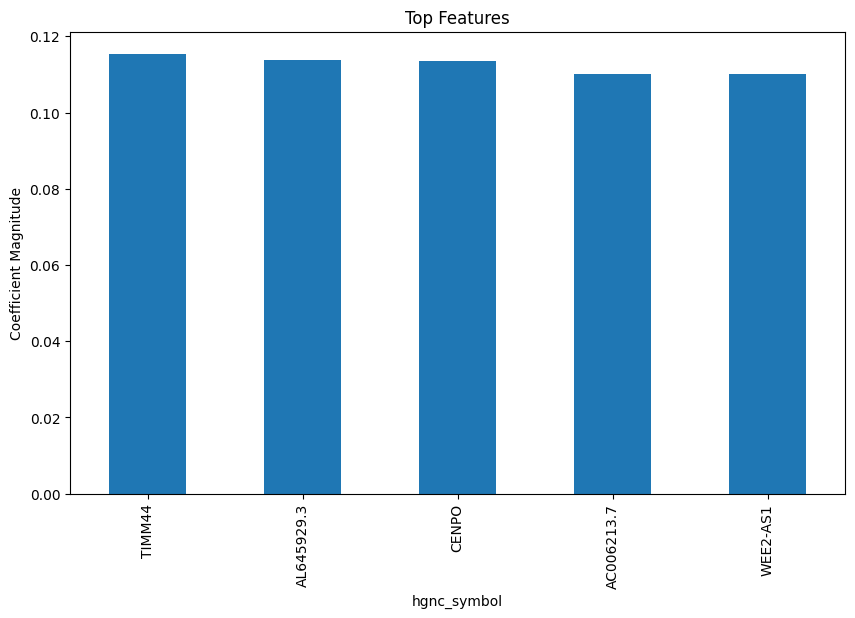

In [198]:
import matplotlib.pyplot as plt

# Plot
plt.figure(figsize=(10, 6))  # adjust the size of the figure as needed
top_features.plot(kind='bar')
plt.title('Top Features')
plt.ylabel('Coefficient Magnitude')
plt.show()


In [203]:
import seaborn as sns
import matplotlib.pyplot as plt

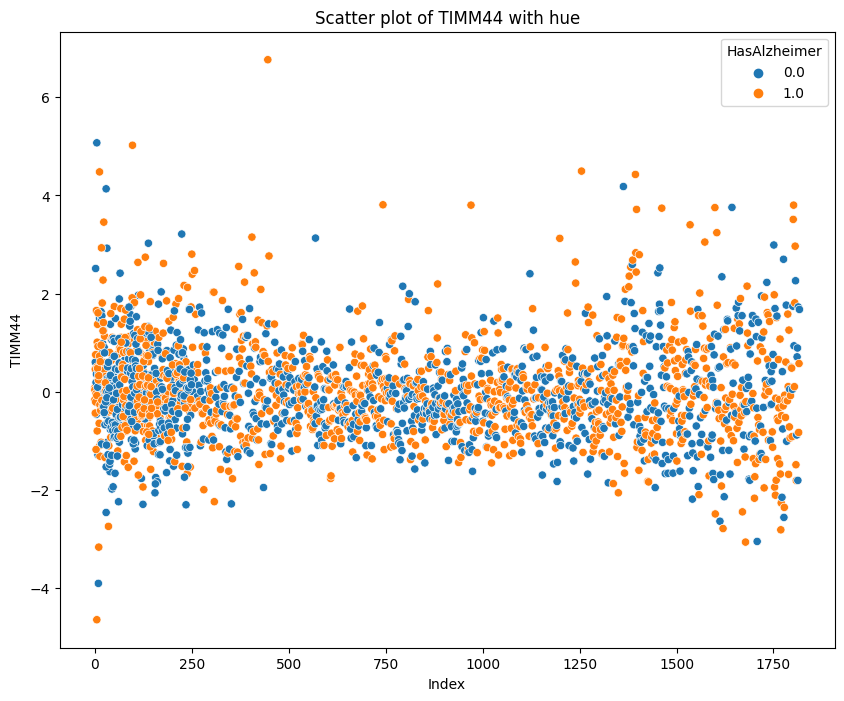

In [207]:
# Scatter plot with hue
plt.figure(figsize=(10, 8))
sns.scatterplot(data=dfz, x=dfz.index, y='ENSG00000104980', hue='HasAlzheimer')

plt.xlabel('Index')
plt.ylabel('TIMM44')
plt.title('Scatter plot of TIMM44 with hue')
plt.show()


In [213]:
dfa.isnull().sum()

specimenID         0
tissue             0
HasAlzheimer       0
ID                 0
ENSG00000000003    0
                  ..
ENSG00000288062    0
ENSG00000288075    0
ENSG00000288107    0
sex                0
sex_marker         0
Length: 17008, dtype: int64

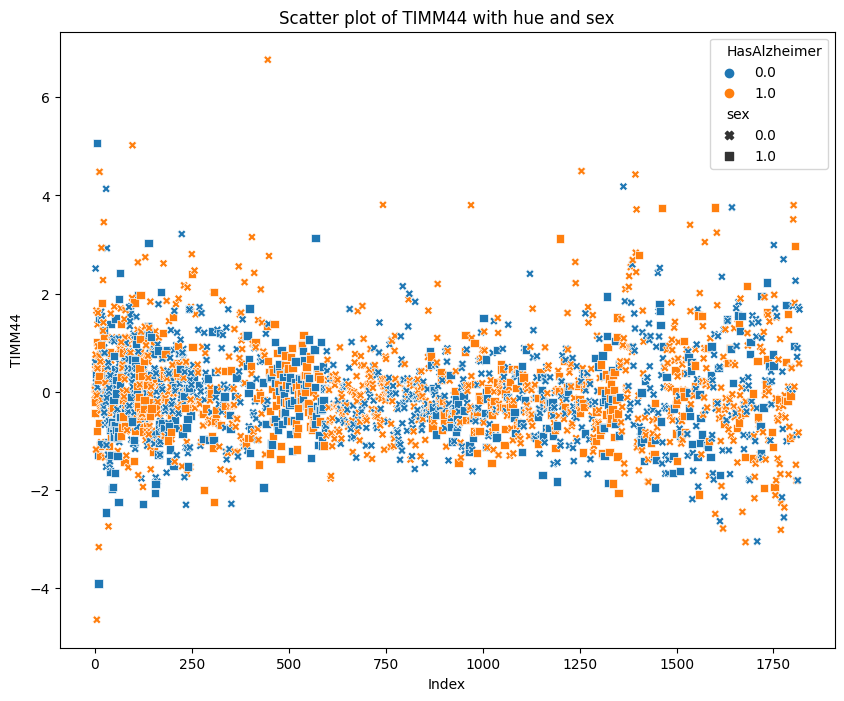

In [220]:
# Create a dictionary to map sex to marker styles
marker_dict = {1: "s", 0: "X"}  # 's': square, 'X': x marker

plt.figure(figsize=(10, 8))
sns.scatterplot(data=dfa, x=dfa.index, y='ENSG00000104980', hue='HasAlzheimer', style=dfa['sex'], markers=marker_dict)

plt.xlabel('Index')
plt.ylabel('TIMM44')
plt.title('Scatter plot of TIMM44 with hue and sex')
plt.show()


/var/folders/38/8tgmhx7s5t3_6pmj8rgrysmm0000gn/T/ipykernel_52015/2255596112.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=dfa[dfa['HasAlzheimer'] == 0], x='ENSG00000104980', label='No Alzheimer', shade=True)
/var/folders/38/8tgmhx7s5t3_6pmj8rgrysmm0000gn/T/ipykernel_52015/2255596112.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=dfa[dfa['HasAlzheimer'] == 1], x='ENSG00000104980', label='Has Alzheimer', shade=True)


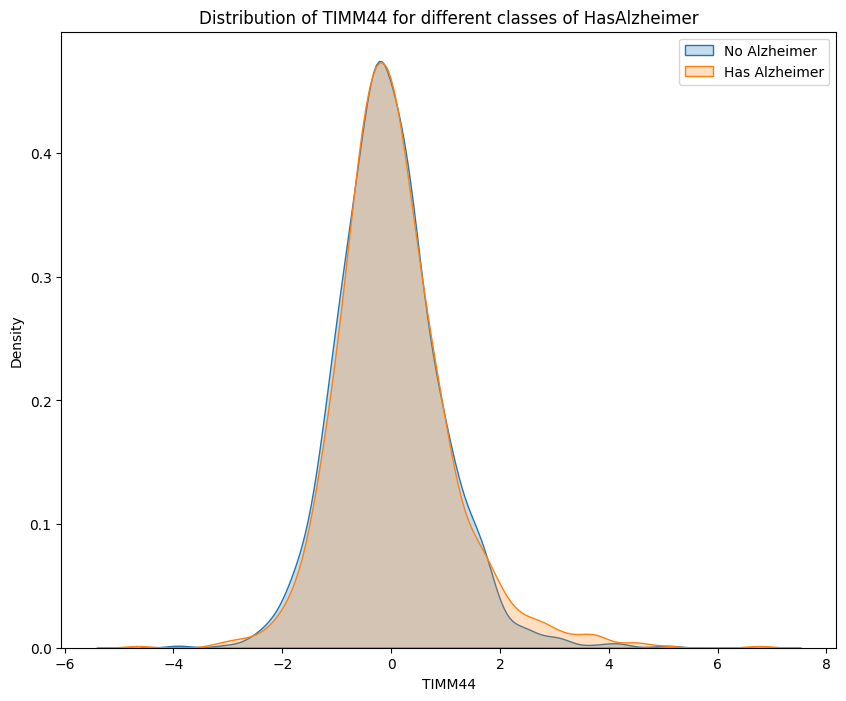

In [221]:
plt.figure(figsize=(10, 8))
sns.kdeplot(data=dfa[dfa['HasAlzheimer'] == 0], x='ENSG00000104980', label='No Alzheimer', shade=True)
sns.kdeplot(data=dfa[dfa['HasAlzheimer'] == 1], x='ENSG00000104980', label='Has Alzheimer', shade=True)
plt.xlabel('TIMM44')
plt.title('Distribution of TIMM44 for different classes of HasAlzheimer')
plt.legend()
plt.show()


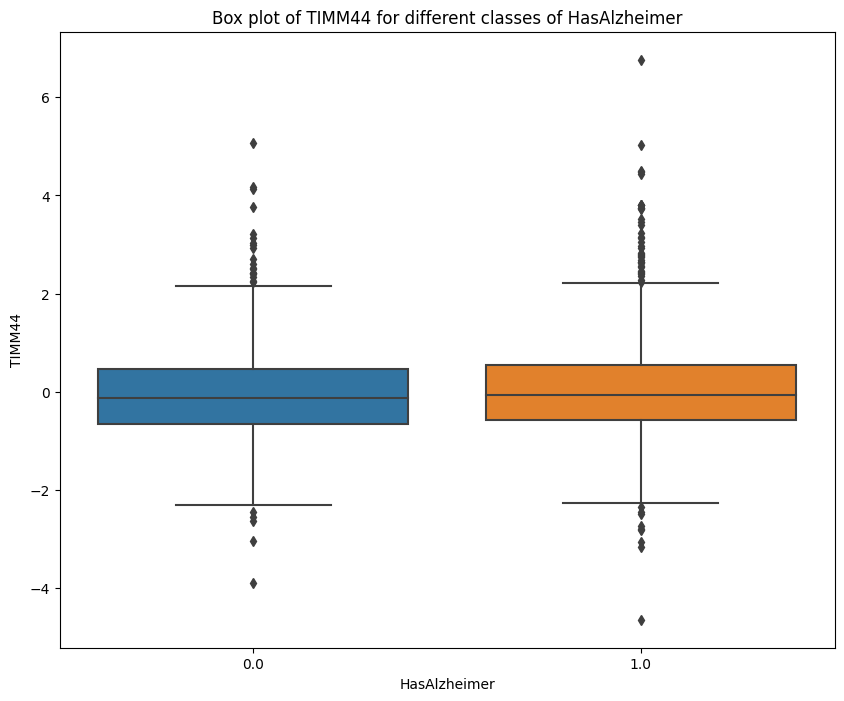

In [222]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=dfa, x='HasAlzheimer', y='ENSG00000104980')
plt.xlabel('HasAlzheimer')
plt.ylabel('TIMM44')
plt.title('Box plot of TIMM44 for different classes of HasAlzheimer')
plt.show()


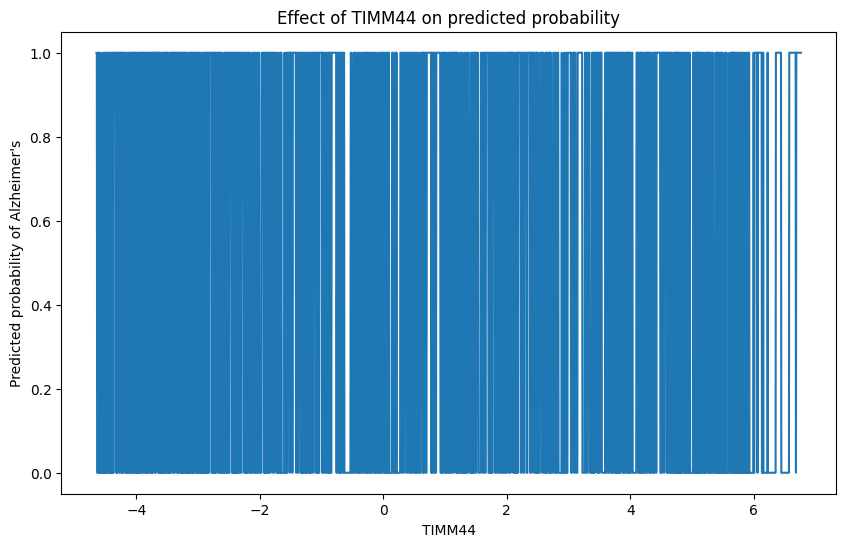

In [227]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Assuming X is your predictor matrix and model is your fitted logistic regression model
X_copy = X.copy()
X_copy['ENSG00000104980'] = np.linspace(X['ENSG00000104980'].min(), X['ENSG00000104980'].max(), len(X))

probs = pipe2.predict(sm.add_constant(X_copy))  # Compute predicted probabilities

plt.figure(figsize=(10, 6))
plt.plot(X_copy['ENSG00000104980'], probs)
plt.xlabel('TIMM44')
plt.ylabel('Predicted probability of Alzheimer\'s')
plt.title('Effect of TIMM44 on predicted probability')
plt.show()


In [232]:
# Generate a range of TIMM44 values
timm44_range = np.linspace(dfz['ENSG00000104980'].min(), dfz['ENSG00000104980'].max(), num=1000)

# Make a DataFrame with these TIMM44 values, keeping other features constant
df_predict = pd.DataFrame(data=timm44_range, columns=['ENSG00000104980'])

for column in dfz.columns:
    if dfz[column].dtype == 'object':  # for non-numerical columns
        df_predict[column] = dfz[column].mode().iloc[0]  # use mode value for non-numerical features
    elif column != 'ENSG00000104980':
        df_predict[column] = dfz[column].mean()  # use mean value for other numerical features

# Compute predicted probabilities
probs = pipe2.predict_proba(df_predict)[:, 1]  # probabilities for class 1 (Alzheimer's)

# Add the probabilities to the DataFrame
df_predict['probability'] = probs

# Compute average probability in different ranges of TIMM44 values
df_predict['timm44_bin'] = pd.cut(df_predict['ENSG00000104980'], bins=10)  # divide TIMM44 values into 10 equal-sized bins
average_probs = df_predict.groupby('timm44_bin')['probability'].mean()

print(average_probs)


/var/folders/38/8tgmhx7s5t3_6pmj8rgrysmm0000gn/T/ipykernel_52015/3553864093.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_predict[column] = dfz[column].mean()  # use mean value for other numerical features
/var/folders/38/8tgmhx7s5t3_6pmj8rgrysmm0000gn/T/ipykernel_52015/3553864093.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_predict[column] = dfz[column].mean()  # use mean value for other numerical features
/var/folders/38/8tgmhx7s5t3_6pmj8rgrysmm0000gn/T/ipykernel_52015/3553864093.py:11: PerformanceWarning:

/var/folders/38/8tgmhx7s5t3_6pmj8rgrysmm0000gn/T/ipykernel_52015/3553864093.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_predict[column] = dfz[column].mean()  # use mean value for other numerical features
/var/folders/38/8tgmhx7s5t3_6pmj8rgrysmm0000gn/T/ipykernel_52015/3553864093.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_predict[column] = dfz[column].mean()  # use mean value for other numerical features
/var/folders/38/8tgmhx7s5t3_6pmj8rgrysmm0000gn/T/ipykernel_52015/3553864093.py:11: PerformanceWarning:

/var/folders/38/8tgmhx7s5t3_6pmj8rgrysmm0000gn/T/ipykernel_52015/3553864093.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_predict[column] = dfz[column].mean()  # use mean value for other numerical features
/var/folders/38/8tgmhx7s5t3_6pmj8rgrysmm0000gn/T/ipykernel_52015/3553864093.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_predict[column] = dfz[column].mean()  # use mean value for other numerical features
/var/folders/38/8tgmhx7s5t3_6pmj8rgrysmm0000gn/T/ipykernel_52015/3553864093.py:11: PerformanceWarning:

/var/folders/38/8tgmhx7s5t3_6pmj8rgrysmm0000gn/T/ipykernel_52015/3553864093.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_predict[column] = dfz[column].mean()  # use mean value for other numerical features
/var/folders/38/8tgmhx7s5t3_6pmj8rgrysmm0000gn/T/ipykernel_52015/3553864093.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_predict[column] = dfz[column].mean()  # use mean value for other numerical features
/var/folders/38/8tgmhx7s5t3_6pmj8rgrysmm0000gn/T/ipykernel_52015/3553864093.py:11: PerformanceWarning:

/var/folders/38/8tgmhx7s5t3_6pmj8rgrysmm0000gn/T/ipykernel_52015/3553864093.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_predict[column] = dfz[column].mean()  # use mean value for other numerical features
/var/folders/38/8tgmhx7s5t3_6pmj8rgrysmm0000gn/T/ipykernel_52015/3553864093.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_predict[column] = dfz[column].mean()  # use mean value for other numerical features
/var/folders/38/8tgmhx7s5t3_6pmj8rgrysmm0000gn/T/ipykernel_52015/3553864093.py:11: PerformanceWarning:

/var/folders/38/8tgmhx7s5t3_6pmj8rgrysmm0000gn/T/ipykernel_52015/3553864093.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_predict[column] = dfz[column].mean()  # use mean value for other numerical features
/var/folders/38/8tgmhx7s5t3_6pmj8rgrysmm0000gn/T/ipykernel_52015/3553864093.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_predict[column] = dfz[column].mean()  # use mean value for other numerical features
/var/folders/38/8tgmhx7s5t3_6pmj8rgrysmm0000gn/T/ipykernel_52015/3553864093.py:11: PerformanceWarning:

/var/folders/38/8tgmhx7s5t3_6pmj8rgrysmm0000gn/T/ipykernel_52015/3553864093.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_predict[column] = dfz[column].mean()  # use mean value for other numerical features
/var/folders/38/8tgmhx7s5t3_6pmj8rgrysmm0000gn/T/ipykernel_52015/3553864093.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_predict[column] = dfz[column].mean()  # use mean value for other numerical features
/var/folders/38/8tgmhx7s5t3_6pmj8rgrysmm0000gn/T/ipykernel_52015/3553864093.py:11: PerformanceWarning:

/var/folders/38/8tgmhx7s5t3_6pmj8rgrysmm0000gn/T/ipykernel_52015/3553864093.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_predict[column] = dfz[column].mean()  # use mean value for other numerical features
/var/folders/38/8tgmhx7s5t3_6pmj8rgrysmm0000gn/T/ipykernel_52015/3553864093.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_predict[column] = dfz[column].mean()  # use mean value for other numerical features
/var/folders/38/8tgmhx7s5t3_6pmj8rgrysmm0000gn/T/ipykernel_52015/3553864093.py:11: PerformanceWarning:

/var/folders/38/8tgmhx7s5t3_6pmj8rgrysmm0000gn/T/ipykernel_52015/3553864093.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_predict[column] = dfz[column].mean()  # use mean value for other numerical features
/var/folders/38/8tgmhx7s5t3_6pmj8rgrysmm0000gn/T/ipykernel_52015/3553864093.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_predict[column] = dfz[column].mean()  # use mean value for other numerical features
/var/folders/38/8tgmhx7s5t3_6pmj8rgrysmm0000gn/T/ipykernel_52015/3553864093.py:11: PerformanceWarning:

/var/folders/38/8tgmhx7s5t3_6pmj8rgrysmm0000gn/T/ipykernel_52015/3553864093.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_predict[column] = dfz[column].mean()  # use mean value for other numerical features
/var/folders/38/8tgmhx7s5t3_6pmj8rgrysmm0000gn/T/ipykernel_52015/3553864093.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_predict[column] = dfz[column].mean()  # use mean value for other numerical features
/var/folders/38/8tgmhx7s5t3_6pmj8rgrysmm0000gn/T/ipykernel_52015/3553864093.py:11: PerformanceWarning:

/var/folders/38/8tgmhx7s5t3_6pmj8rgrysmm0000gn/T/ipykernel_52015/3553864093.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_predict[column] = dfz[column].mean()  # use mean value for other numerical features
/var/folders/38/8tgmhx7s5t3_6pmj8rgrysmm0000gn/T/ipykernel_52015/3553864093.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_predict[column] = dfz[column].mean()  # use mean value for other numerical features
/var/folders/38/8tgmhx7s5t3_6pmj8rgrysmm0000gn/T/ipykernel_52015/3553864093.py:11: PerformanceWarning:

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

/var/folders/38/8tgmhx7s5t3_6pmj8rgrysmm0000gn/T/ipykernel_52015/3553864093.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_predict[column] = dfz[column].mean()  # use mean value for other numerical features
/var/folders/38/8tgmhx7s5t3_6pmj8rgrysmm0000gn/T/ipykernel_52015/3553864093.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perform

/var/folders/38/8tgmhx7s5t3_6pmj8rgrysmm0000gn/T/ipykernel_52015/3553864093.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_predict[column] = dfz[column].mean()  # use mean value for other numerical features
/var/folders/38/8tgmhx7s5t3_6pmj8rgrysmm0000gn/T/ipykernel_52015/3553864093.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_predict[column] = dfz[column].mean()  # use mean value for other numerical features
/var/folders/38/8tgmhx7s5t3_6pmj8rgrysmm0000gn/T/ipykernel_52015/3553864093.py:11: PerformanceWarning:

/var/folders/38/8tgmhx7s5t3_6pmj8rgrysmm0000gn/T/ipykernel_52015/3553864093.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_predict[column] = dfz[column].mean()  # use mean value for other numerical features
/var/folders/38/8tgmhx7s5t3_6pmj8rgrysmm0000gn/T/ipykernel_52015/3553864093.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_predict[column] = dfz[column].mean()  # use mean value for other numerical features
/var/folders/38/8tgmhx7s5t3_6pmj8rgrysmm0000gn/T/ipykernel_52015/3553864093.py:11: PerformanceWarning:

/var/folders/38/8tgmhx7s5t3_6pmj8rgrysmm0000gn/T/ipykernel_52015/3553864093.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_predict[column] = dfz[column].mean()  # use mean value for other numerical features
/var/folders/38/8tgmhx7s5t3_6pmj8rgrysmm0000gn/T/ipykernel_52015/3553864093.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_predict[column] = dfz[column].mean()  # use mean value for other numerical features
/var/folders/38/8tgmhx7s5t3_6pmj8rgrysmm0000gn/T/ipykernel_52015/3553864093.py:11: PerformanceWarning:

/var/folders/38/8tgmhx7s5t3_6pmj8rgrysmm0000gn/T/ipykernel_52015/3553864093.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_predict[column] = dfz[column].mean()  # use mean value for other numerical features
/var/folders/38/8tgmhx7s5t3_6pmj8rgrysmm0000gn/T/ipykernel_52015/3553864093.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_predict[column] = dfz[column].mean()  # use mean value for other numerical features
/var/folders/38/8tgmhx7s5t3_6pmj8rgrysmm0000gn/T/ipykernel_52015/3553864093.py:11: PerformanceWarning:

/var/folders/38/8tgmhx7s5t3_6pmj8rgrysmm0000gn/T/ipykernel_52015/3553864093.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_predict[column] = dfz[column].mean()  # use mean value for other numerical features
/var/folders/38/8tgmhx7s5t3_6pmj8rgrysmm0000gn/T/ipykernel_52015/3553864093.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_predict[column] = dfz[column].mean()  # use mean value for other numerical features
/var/folders/38/8tgmhx7s5t3_6pmj8rgrysmm0000gn/T/ipykernel_52015/3553864093.py:11: PerformanceWarning:

/var/folders/38/8tgmhx7s5t3_6pmj8rgrysmm0000gn/T/ipykernel_52015/3553864093.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_predict[column] = dfz[column].mean()  # use mean value for other numerical features
/var/folders/38/8tgmhx7s5t3_6pmj8rgrysmm0000gn/T/ipykernel_52015/3553864093.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_predict[column] = dfz[column].mean()  # use mean value for other numerical features
/var/folders/38/8tgmhx7s5t3_6pmj8rgrysmm0000gn/T/ipykernel_52015/3553864093.py:11: PerformanceWarning:

/var/folders/38/8tgmhx7s5t3_6pmj8rgrysmm0000gn/T/ipykernel_52015/3553864093.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_predict[column] = dfz[column].mean()  # use mean value for other numerical features
/var/folders/38/8tgmhx7s5t3_6pmj8rgrysmm0000gn/T/ipykernel_52015/3553864093.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_predict[column] = dfz[column].mean()  # use mean value for other numerical features
/var/folders/38/8tgmhx7s5t3_6pmj8rgrysmm0000gn/T/ipykernel_52015/3553864093.py:11: PerformanceWarning:

/var/folders/38/8tgmhx7s5t3_6pmj8rgrysmm0000gn/T/ipykernel_52015/3553864093.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_predict[column] = dfz[column].mean()  # use mean value for other numerical features
/var/folders/38/8tgmhx7s5t3_6pmj8rgrysmm0000gn/T/ipykernel_52015/3553864093.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_predict[column] = dfz[column].mean()  # use mean value for other numerical features
/var/folders/38/8tgmhx7s5t3_6pmj8rgrysmm0000gn/T/ipykernel_52015/3553864093.py:11: PerformanceWarning:

/var/folders/38/8tgmhx7s5t3_6pmj8rgrysmm0000gn/T/ipykernel_52015/3553864093.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_predict[column] = dfz[column].mean()  # use mean value for other numerical features
/var/folders/38/8tgmhx7s5t3_6pmj8rgrysmm0000gn/T/ipykernel_52015/3553864093.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_predict[column] = dfz[column].mean()  # use mean value for other numerical features
/var/folders/38/8tgmhx7s5t3_6pmj8rgrysmm0000gn/T/ipykernel_52015/3553864093.py:11: PerformanceWarning:

/var/folders/38/8tgmhx7s5t3_6pmj8rgrysmm0000gn/T/ipykernel_52015/3553864093.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_predict[column] = dfz[column].mean()  # use mean value for other numerical features
/var/folders/38/8tgmhx7s5t3_6pmj8rgrysmm0000gn/T/ipykernel_52015/3553864093.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_predict[column] = dfz[column].mean()  # use mean value for other numerical features
/var/folders/38/8tgmhx7s5t3_6pmj8rgrysmm0000gn/T/ipykernel_52015/3553864093.py:11: PerformanceWarning:

/var/folders/38/8tgmhx7s5t3_6pmj8rgrysmm0000gn/T/ipykernel_52015/3553864093.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_predict[column] = dfz[column].mean()  # use mean value for other numerical features
/var/folders/38/8tgmhx7s5t3_6pmj8rgrysmm0000gn/T/ipykernel_52015/3553864093.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_predict[column] = dfz[column].mean()  # use mean value for other numerical features
/var/folders/38/8tgmhx7s5t3_6pmj8rgrysmm0000gn/T/ipykernel_52015/3553864093.py:11: PerformanceWarning:

/var/folders/38/8tgmhx7s5t3_6pmj8rgrysmm0000gn/T/ipykernel_52015/3553864093.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_predict[column] = dfz[column].mean()  # use mean value for other numerical features
/var/folders/38/8tgmhx7s5t3_6pmj8rgrysmm0000gn/T/ipykernel_52015/3553864093.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_predict[column] = dfz[column].mean()  # use mean value for other numerical features
/var/folders/38/8tgmhx7s5t3_6pmj8rgrysmm0000gn/T/ipykernel_52015/3553864093.py:11: PerformanceWarning:

/var/folders/38/8tgmhx7s5t3_6pmj8rgrysmm0000gn/T/ipykernel_52015/3553864093.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_predict[column] = dfz[column].mean()  # use mean value for other numerical features
/var/folders/38/8tgmhx7s5t3_6pmj8rgrysmm0000gn/T/ipykernel_52015/3553864093.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_predict[column] = dfz[column].mean()  # use mean value for other numerical features
/var/folders/38/8tgmhx7s5t3_6pmj8rgrysmm0000gn/T/ipykernel_52015/3553864093.py:11: PerformanceWarning:

/var/folders/38/8tgmhx7s5t3_6pmj8rgrysmm0000gn/T/ipykernel_52015/3553864093.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_predict[column] = dfz[column].mean()  # use mean value for other numerical features
/var/folders/38/8tgmhx7s5t3_6pmj8rgrysmm0000gn/T/ipykernel_52015/3553864093.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_predict[column] = dfz[column].mean()  # use mean value for other numerical features
/var/folders/38/8tgmhx7s5t3_6pmj8rgrysmm0000gn/T/ipykernel_52015/3553864093.py:11: PerformanceWarning:

/var/folders/38/8tgmhx7s5t3_6pmj8rgrysmm0000gn/T/ipykernel_52015/3553864093.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_predict[column] = dfz[column].mean()  # use mean value for other numerical features
/var/folders/38/8tgmhx7s5t3_6pmj8rgrysmm0000gn/T/ipykernel_52015/3553864093.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_predict[column] = dfz[column].mean()  # use mean value for other numerical features
/var/folders/38/8tgmhx7s5t3_6pmj8rgrysmm0000gn/T/ipykernel_52015/3553864093.py:11: PerformanceWarning:

/var/folders/38/8tgmhx7s5t3_6pmj8rgrysmm0000gn/T/ipykernel_52015/3553864093.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_predict[column] = dfz[column].mean()  # use mean value for other numerical features
/var/folders/38/8tgmhx7s5t3_6pmj8rgrysmm0000gn/T/ipykernel_52015/3553864093.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_predict[column] = dfz[column].mean()  # use mean value for other numerical features
/var/folders/38/8tgmhx7s5t3_6pmj8rgrysmm0000gn/T/ipykernel_52015/3553864093.py:11: PerformanceWarning:

/var/folders/38/8tgmhx7s5t3_6pmj8rgrysmm0000gn/T/ipykernel_52015/3553864093.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_predict[column] = dfz[column].mean()  # use mean value for other numerical features
/var/folders/38/8tgmhx7s5t3_6pmj8rgrysmm0000gn/T/ipykernel_52015/3553864093.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_predict[column] = dfz[column].mean()  # use mean value for other numerical features
/var/folders/38/8tgmhx7s5t3_6pmj8rgrysmm0000gn/T/ipykernel_52015/3553864093.py:11: PerformanceWarning:

/var/folders/38/8tgmhx7s5t3_6pmj8rgrysmm0000gn/T/ipykernel_52015/3553864093.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_predict[column] = dfz[column].mean()  # use mean value for other numerical features
/var/folders/38/8tgmhx7s5t3_6pmj8rgrysmm0000gn/T/ipykernel_52015/3553864093.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_predict[column] = dfz[column].mean()  # use mean value for other numerical features
/var/folders/38/8tgmhx7s5t3_6pmj8rgrysmm0000gn/T/ipykernel_52015/3553864093.py:11: PerformanceWarning:

/var/folders/38/8tgmhx7s5t3_6pmj8rgrysmm0000gn/T/ipykernel_52015/3553864093.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_predict[column] = dfz[column].mean()  # use mean value for other numerical features
/var/folders/38/8tgmhx7s5t3_6pmj8rgrysmm0000gn/T/ipykernel_52015/3553864093.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_predict[column] = dfz[column].mean()  # use mean value for other numerical features
/var/folders/38/8tgmhx7s5t3_6pmj8rgrysmm0000gn/T/ipykernel_52015/3553864093.py:11: PerformanceWarning:

/var/folders/38/8tgmhx7s5t3_6pmj8rgrysmm0000gn/T/ipykernel_52015/3553864093.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_predict[column] = dfz[column].mean()  # use mean value for other numerical features
/var/folders/38/8tgmhx7s5t3_6pmj8rgrysmm0000gn/T/ipykernel_52015/3553864093.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_predict[column] = dfz[column].mean()  # use mean value for other numerical features
/var/folders/38/8tgmhx7s5t3_6pmj8rgrysmm0000gn/T/ipykernel_52015/3553864093.py:11: PerformanceWarning:

/var/folders/38/8tgmhx7s5t3_6pmj8rgrysmm0000gn/T/ipykernel_52015/3553864093.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_predict[column] = dfz[column].mean()  # use mean value for other numerical features
/var/folders/38/8tgmhx7s5t3_6pmj8rgrysmm0000gn/T/ipykernel_52015/3553864093.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_predict[column] = dfz[column].mean()  # use mean value for other numerical features
/var/folders/38/8tgmhx7s5t3_6pmj8rgrysmm0000gn/T/ipykernel_52015/3553864093.py:11: PerformanceWarning:

/var/folders/38/8tgmhx7s5t3_6pmj8rgrysmm0000gn/T/ipykernel_52015/3553864093.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_predict[column] = dfz[column].mean()  # use mean value for other numerical features
/var/folders/38/8tgmhx7s5t3_6pmj8rgrysmm0000gn/T/ipykernel_52015/3553864093.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_predict[column] = dfz[column].mean()  # use mean value for other numerical features
/var/folders/38/8tgmhx7s5t3_6pmj8rgrysmm0000gn/T/ipykernel_52015/3553864093.py:11: PerformanceWarning:

/var/folders/38/8tgmhx7s5t3_6pmj8rgrysmm0000gn/T/ipykernel_52015/3553864093.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_predict[column] = dfz[column].mean()  # use mean value for other numerical features
/var/folders/38/8tgmhx7s5t3_6pmj8rgrysmm0000gn/T/ipykernel_52015/3553864093.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_predict[column] = dfz[column].mean()  # use mean value for other numerical features
/var/folders/38/8tgmhx7s5t3_6pmj8rgrysmm0000gn/T/ipykernel_52015/3553864093.py:11: PerformanceWarning:

/var/folders/38/8tgmhx7s5t3_6pmj8rgrysmm0000gn/T/ipykernel_52015/3553864093.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_predict[column] = dfz[column].mean()  # use mean value for other numerical features
/var/folders/38/8tgmhx7s5t3_6pmj8rgrysmm0000gn/T/ipykernel_52015/3553864093.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_predict[column] = dfz[column].mean()  # use mean value for other numerical features
/var/folders/38/8tgmhx7s5t3_6pmj8rgrysmm0000gn/T/ipykernel_52015/3553864093.py:11: PerformanceWarning:

/var/folders/38/8tgmhx7s5t3_6pmj8rgrysmm0000gn/T/ipykernel_52015/3553864093.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_predict[column] = dfz[column].mean()  # use mean value for other numerical features
/var/folders/38/8tgmhx7s5t3_6pmj8rgrysmm0000gn/T/ipykernel_52015/3553864093.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_predict[column] = dfz[column].mean()  # use mean value for other numerical features
/var/folders/38/8tgmhx7s5t3_6pmj8rgrysmm0000gn/T/ipykernel_52015/3553864093.py:11: PerformanceWarning:

/var/folders/38/8tgmhx7s5t3_6pmj8rgrysmm0000gn/T/ipykernel_52015/3553864093.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_predict[column] = dfz[column].mean()  # use mean value for other numerical features
/var/folders/38/8tgmhx7s5t3_6pmj8rgrysmm0000gn/T/ipykernel_52015/3553864093.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_predict[column] = dfz[column].mean()  # use mean value for other numerical features
/var/folders/38/8tgmhx7s5t3_6pmj8rgrysmm0000gn/T/ipykernel_52015/3553864093.py:11: PerformanceWarning:

/var/folders/38/8tgmhx7s5t3_6pmj8rgrysmm0000gn/T/ipykernel_52015/3553864093.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_predict[column] = dfz[column].mean()  # use mean value for other numerical features
/var/folders/38/8tgmhx7s5t3_6pmj8rgrysmm0000gn/T/ipykernel_52015/3553864093.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_predict[column] = dfz[column].mean()  # use mean value for other numerical features
/var/folders/38/8tgmhx7s5t3_6pmj8rgrysmm0000gn/T/ipykernel_52015/3553864093.py:11: PerformanceWarning:

/var/folders/38/8tgmhx7s5t3_6pmj8rgrysmm0000gn/T/ipykernel_52015/3553864093.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_predict[column] = dfz[column].mean()  # use mean value for other numerical features
/var/folders/38/8tgmhx7s5t3_6pmj8rgrysmm0000gn/T/ipykernel_52015/3553864093.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_predict[column] = dfz[column].mean()  # use mean value for other numerical features
/var/folders/38/8tgmhx7s5t3_6pmj8rgrysmm0000gn/T/ipykernel_52015/3553864093.py:11: PerformanceWarning:

/var/folders/38/8tgmhx7s5t3_6pmj8rgrysmm0000gn/T/ipykernel_52015/3553864093.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_predict[column] = dfz[column].mean()  # use mean value for other numerical features
/var/folders/38/8tgmhx7s5t3_6pmj8rgrysmm0000gn/T/ipykernel_52015/3553864093.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_predict[column] = dfz[column].mean()  # use mean value for other numerical features
/var/folders/38/8tgmhx7s5t3_6pmj8rgrysmm0000gn/T/ipykernel_52015/3553864093.py:11: PerformanceWarning:

/var/folders/38/8tgmhx7s5t3_6pmj8rgrysmm0000gn/T/ipykernel_52015/3553864093.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_predict[column] = dfz[column].mean()  # use mean value for other numerical features
/var/folders/38/8tgmhx7s5t3_6pmj8rgrysmm0000gn/T/ipykernel_52015/3553864093.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_predict[column] = dfz[column].mean()  # use mean value for other numerical features
/var/folders/38/8tgmhx7s5t3_6pmj8rgrysmm0000gn/T/ipykernel_52015/3553864093.py:11: PerformanceWarning:

/var/folders/38/8tgmhx7s5t3_6pmj8rgrysmm0000gn/T/ipykernel_52015/3553864093.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_predict[column] = dfz[column].mean()  # use mean value for other numerical features
/var/folders/38/8tgmhx7s5t3_6pmj8rgrysmm0000gn/T/ipykernel_52015/3553864093.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_predict[column] = dfz[column].mean()  # use mean value for other numerical features
/var/folders/38/8tgmhx7s5t3_6pmj8rgrysmm0000gn/T/ipykernel_52015/3553864093.py:11: PerformanceWarning:

/var/folders/38/8tgmhx7s5t3_6pmj8rgrysmm0000gn/T/ipykernel_52015/3553864093.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_predict[column] = dfz[column].mean()  # use mean value for other numerical features
/var/folders/38/8tgmhx7s5t3_6pmj8rgrysmm0000gn/T/ipykernel_52015/3553864093.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_predict[column] = dfz[column].mean()  # use mean value for other numerical features
/var/folders/38/8tgmhx7s5t3_6pmj8rgrysmm0000gn/T/ipykernel_52015/3553864093.py:11: PerformanceWarning:

/var/folders/38/8tgmhx7s5t3_6pmj8rgrysmm0000gn/T/ipykernel_52015/3553864093.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_predict[column] = dfz[column].mean()  # use mean value for other numerical features
/var/folders/38/8tgmhx7s5t3_6pmj8rgrysmm0000gn/T/ipykernel_52015/3553864093.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_predict[column] = dfz[column].mean()  # use mean value for other numerical features
/var/folders/38/8tgmhx7s5t3_6pmj8rgrysmm0000gn/T/ipykernel_52015/3553864093.py:11: PerformanceWarning:

/var/folders/38/8tgmhx7s5t3_6pmj8rgrysmm0000gn/T/ipykernel_52015/3553864093.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_predict[column] = dfz[column].mean()  # use mean value for other numerical features
/var/folders/38/8tgmhx7s5t3_6pmj8rgrysmm0000gn/T/ipykernel_52015/3553864093.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_predict[column] = dfz[column].mean()  # use mean value for other numerical features
/var/folders/38/8tgmhx7s5t3_6pmj8rgrysmm0000gn/T/ipykernel_52015/3553864093.py:11: PerformanceWarning:

/var/folders/38/8tgmhx7s5t3_6pmj8rgrysmm0000gn/T/ipykernel_52015/3553864093.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_predict[column] = dfz[column].mean()  # use mean value for other numerical features
/var/folders/38/8tgmhx7s5t3_6pmj8rgrysmm0000gn/T/ipykernel_52015/3553864093.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_predict[column] = dfz[column].mean()  # use mean value for other numerical features
/var/folders/38/8tgmhx7s5t3_6pmj8rgrysmm0000gn/T/ipykernel_52015/3553864093.py:11: PerformanceWarning:

/var/folders/38/8tgmhx7s5t3_6pmj8rgrysmm0000gn/T/ipykernel_52015/3553864093.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_predict[column] = dfz[column].mean()  # use mean value for other numerical features
/var/folders/38/8tgmhx7s5t3_6pmj8rgrysmm0000gn/T/ipykernel_52015/3553864093.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_predict[column] = dfz[column].mean()  # use mean value for other numerical features
/var/folders/38/8tgmhx7s5t3_6pmj8rgrysmm0000gn/T/ipykernel_52015/3553864093.py:11: PerformanceWarning:

/var/folders/38/8tgmhx7s5t3_6pmj8rgrysmm0000gn/T/ipykernel_52015/3553864093.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_predict[column] = dfz[column].mean()  # use mean value for other numerical features
/var/folders/38/8tgmhx7s5t3_6pmj8rgrysmm0000gn/T/ipykernel_52015/3553864093.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_predict[column] = dfz[column].mean()  # use mean value for other numerical features
/var/folders/38/8tgmhx7s5t3_6pmj8rgrysmm0000gn/T/ipykernel_52015/3553864093.py:11: PerformanceWarning:

/var/folders/38/8tgmhx7s5t3_6pmj8rgrysmm0000gn/T/ipykernel_52015/3553864093.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_predict[column] = dfz[column].mean()  # use mean value for other numerical features
/var/folders/38/8tgmhx7s5t3_6pmj8rgrysmm0000gn/T/ipykernel_52015/3553864093.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_predict[column] = dfz[column].mean()  # use mean value for other numerical features
/var/folders/38/8tgmhx7s5t3_6pmj8rgrysmm0000gn/T/ipykernel_52015/3553864093.py:11: PerformanceWarning:

/var/folders/38/8tgmhx7s5t3_6pmj8rgrysmm0000gn/T/ipykernel_52015/3553864093.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_predict[column] = dfz[column].mean()  # use mean value for other numerical features
/var/folders/38/8tgmhx7s5t3_6pmj8rgrysmm0000gn/T/ipykernel_52015/3553864093.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_predict[column] = dfz[column].mean()  # use mean value for other numerical features
/var/folders/38/8tgmhx7s5t3_6pmj8rgrysmm0000gn/T/ipykernel_52015/3553864093.py:11: PerformanceWarning:

/var/folders/38/8tgmhx7s5t3_6pmj8rgrysmm0000gn/T/ipykernel_52015/3553864093.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_predict[column] = dfz[column].mean()  # use mean value for other numerical features
/var/folders/38/8tgmhx7s5t3_6pmj8rgrysmm0000gn/T/ipykernel_52015/3553864093.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_predict[column] = dfz[column].mean()  # use mean value for other numerical features
/var/folders/38/8tgmhx7s5t3_6pmj8rgrysmm0000gn/T/ipykernel_52015/3553864093.py:11: PerformanceWarning:

timm44_bin
(-4.659, -3.506]     0.573322
(-3.506, -2.365]     0.605131
(-2.365, -1.223]     0.636074
(-1.223, -0.0822]    0.665931
(-0.0822, 1.059]     0.694515
(1.059, 2.2]         0.721677
(2.2, 3.342]         0.747302
(3.342, 4.483]       0.771316
(4.483, 5.624]       0.793679
(5.624, 6.765]       0.814381
Name: probability, dtype: float64


In [233]:
# Create a copy of your dataframe
dfz_copy = dfz.copy()

# Make predictions using the original data
probs_orig = pipe2.predict_proba(X)[:, 1]  # probabilities for class 1 (Alzheimer's)

# Add these probabilities to your copied DataFrame
dfz_copy['probability'] = probs_orig

# Divide TIMM44 values into 10 equal-sized bins
dfz_copy['timm44_bin'] = pd.cut(dfz_copy['ENSG00000104980'], bins=10)  

# Compute average probabilities in different ranges of TIMM44 values
average_probs_orig = dfz_copy.groupby('timm44_bin')['probability'].mean()

print(average_probs_orig)


timm44_bin
(-4.659, -3.506]     0.499760
(-3.506, -2.365]     0.715427
(-2.365, -1.223]     0.475152
(-1.223, -0.0822]    0.513200
(-0.0822, 1.059]     0.527086
(1.059, 2.2]         0.503166
(2.2, 3.342]         0.592929
(3.342, 4.483]       0.752089
(4.483, 5.624]       0.666422
(5.624, 6.765]       0.998804
Name: probability, dtype: float64


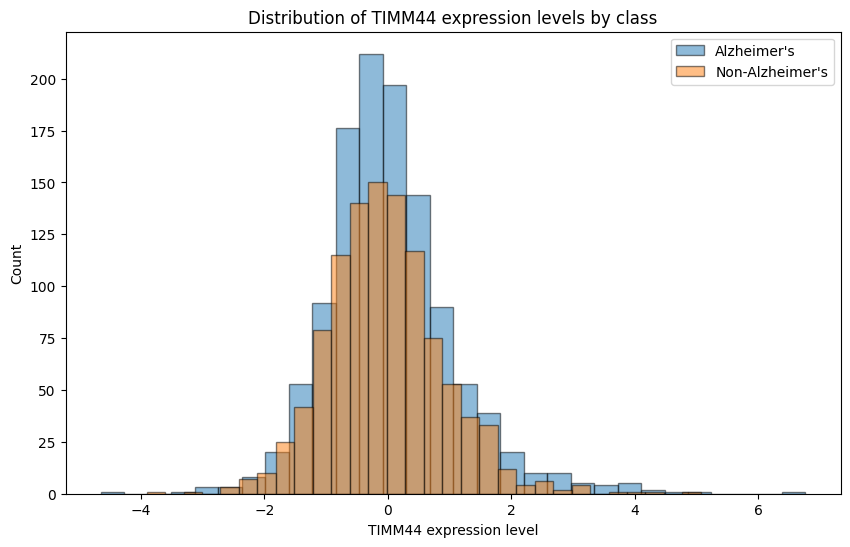

In [236]:
# Merge target variable with the dataframe
dfz_with_target = dfz.copy()

# Separate the dataframe into two: one for Alzheimer's and one for non-Alzheimer's
dfz_alz = dfz_with_target[dfz_with_target['HasAlzheimer'] == 1]
dfz_non_alz = dfz_with_target[dfz_with_target['HasAlzheimer'] == 0]

# Now plot histograms for both
plt.figure(figsize=(10, 6))
plt.hist(dfz_alz['ENSG00000104980'], bins=30, alpha=0.5, label='Alzheimer\'s', edgecolor='black')
plt.hist(dfz_non_alz['ENSG00000104980'], bins=30, alpha=0.5, label='Non-Alzheimer\'s', edgecolor='black')
plt.xlabel('TIMM44 expression level')
plt.ylabel('Count')
plt.title('Distribution of TIMM44 expression levels by class')
plt.legend()
plt.show()


In [238]:
# Merge target variable with the dataframe
dfz_with_target = dfz.copy()

# Separate the dataframe into two: one for Alzheimer's and one for non-Alzheimer's
dfz_alz = dfz_with_target[dfz_with_target['HasAlzheimer'] == 1]
dfz_non_alz = dfz_with_target[dfz_with_target['HasAlzheimer'] == 0]

# For Alzheimer's
bins_alz = pd.cut(dfz_alz['ENSG00000104980'], bins=10)
alz_counts = dfz_alz['ENSG00000104980'].groupby(bins_alz).count()

# For Non-Alzheimer's
bins_non_alz = pd.cut(dfz_non_alz['ENSG00000104980'], bins=10)
non_alz_counts = dfz_non_alz['ENSG00000104980'].groupby(bins_non_alz).count()

# Combine the counts into a single DataFrame
df_counts = pd.DataFrame({'Alzheimer\'s': alz_counts, 'Non-Alzheimer\'s': non_alz_counts})

print(df_counts)



                   Alzheimer's  Non-Alzheimer's
ENSG00000104980                                
(-4.659, -3.506]           1.0              NaN
(-3.506, -2.365]           7.0              NaN
(-2.365, -1.223]          81.0              NaN
(-1.223, -0.0822]        480.0              NaN
(-0.0822, 1.059]         431.0              NaN
(1.059, 2.2]             112.0              NaN
(2.2, 3.342]              25.0              NaN
(3.342, 4.483]            11.0              NaN
(4.483, 5.624]             2.0              NaN
(5.624, 6.765]             1.0              NaN
(-3.916, -3.009]           NaN              2.0
(-3.009, -2.111]           NaN             10.0
(-2.111, -1.213]           NaN             77.0
(-1.213, -0.315]           NaN            334.0
(-0.315, 0.583]            NaN            411.0
(0.583, 1.481]             NaN            165.0
(1.481, 2.378]             NaN             49.0
(2.378, 3.276]             NaN             12.0
(3.276, 4.174]             NaN          

In [239]:
# Get total counts for each group
total_alz = dfz_alz['ENSG00000104980'].count()
total_non_alz = dfz_non_alz['ENSG00000104980'].count()

# Create a new dataframe for proportions
df_prop = df_counts.copy()

# Calculate proportions
df_prop['Alzheimer\'s'] = df_counts['Alzheimer\'s'] / total_alz
df_prop['Non-Alzheimer\'s'] = df_counts['Non-Alzheimer\'s'] / total_non_alz


In [240]:
print(df_prop)

                   Alzheimer's  Non-Alzheimer's
ENSG00000104980                                
(-4.659, -3.506]      0.000869              NaN
(-3.506, -2.365]      0.006082              NaN
(-2.365, -1.223]      0.070374              NaN
(-1.223, -0.0822]     0.417029              NaN
(-0.0822, 1.059]      0.374457              NaN
(1.059, 2.2]          0.097307              NaN
(2.2, 3.342]          0.021720              NaN
(3.342, 4.483]        0.009557              NaN
(4.483, 5.624]        0.001738              NaN
(5.624, 6.765]        0.000869              NaN
(-3.916, -3.009]           NaN         0.001880
(-3.009, -2.111]           NaN         0.009398
(-2.111, -1.213]           NaN         0.072368
(-1.213, -0.315]           NaN         0.313910
(-0.315, 0.583]            NaN         0.386278
(0.583, 1.481]             NaN         0.155075
(1.481, 2.378]             NaN         0.046053
(2.378, 3.276]             NaN         0.011278
(3.276, 4.174]             NaN         0

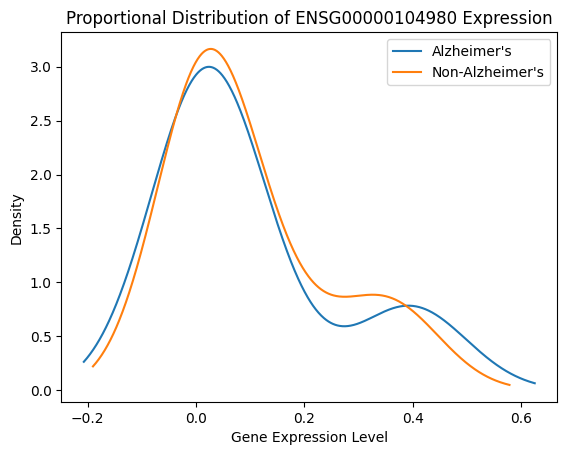

In [241]:
# Create figure and axis
fig, ax = plt.subplots()

# Plot density plot
df_prop.plot(kind='density', ax=ax)

# Set title and labels
ax.set_title('Proportional Distribution of ENSG00000104980 Expression')
ax.set_xlabel('Gene Expression Level')
ax.set_ylabel('Density')

# Show the plot
plt.show()


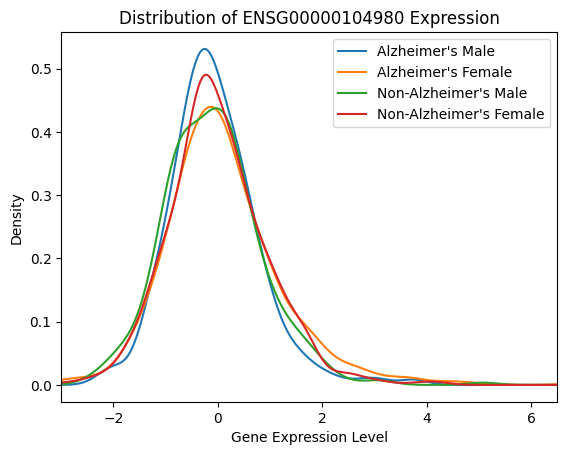

In [247]:
# Create four dataframes based on the combination of Alzheimer's and sex
dfz_alz_m = dfz_with_target[(dfz_with_target['HasAlzheimer'] == 1) & (dfz_with_target['sex'] == 1)]
dfz_alz_f = dfz_with_target[(dfz_with_target['HasAlzheimer'] == 1) & (dfz_with_target['sex'] == 0)]
dfz_non_alz_m = dfz_with_target[(dfz_with_target['HasAlzheimer'] == 0) & (dfz_with_target['sex'] == 1)]
dfz_non_alz_f = dfz_with_target[(dfz_with_target['HasAlzheimer'] == 0) & (dfz_with_target['sex'] == 0)]

# Create figure and axis
fig, ax = plt.subplots()

# Plot density plot for each group
dfz_alz_m['ENSG00000104980'].plot(kind='density', ax=ax, label='Alzheimer\'s Male')
dfz_alz_f['ENSG00000104980'].plot(kind='density', ax=ax, label='Alzheimer\'s Female')
dfz_non_alz_m['ENSG00000104980'].plot(kind='density', ax=ax, label='Non-Alzheimer\'s Male')
dfz_non_alz_f['ENSG00000104980'].plot(kind='density', ax=ax, label='Non-Alzheimer\'s Female')

# Set title and labels
ax.set_title('Distribution of ENSG00000104980 Expression')
ax.set_xlabel('Gene Expression Level')
ax.set_ylabel('Density')
ax.set_xlim([-3, 6.5])

# Show legend
ax.legend()

# Show the plot
plt.show()


In [249]:
# Compute correlations
correlations = dfz.corrwith(dfz['ENSG00000104980']).sort_values(ascending=False)

# Print the correlations
print(correlations)


ENSG00000104980    1.000000
ENSG00000134815    0.607400
ENSG00000160087    0.584171
ENSG00000182208    0.575606
ENSG00000104960    0.563796
                     ...   
ENSG00000112697   -0.483543
ENSG00000256043   -0.490187
ENSG00000109919   -0.491613
ENSG00000117906   -0.499024
ENSG00000138613   -0.524837
Length: 17004, dtype: float64


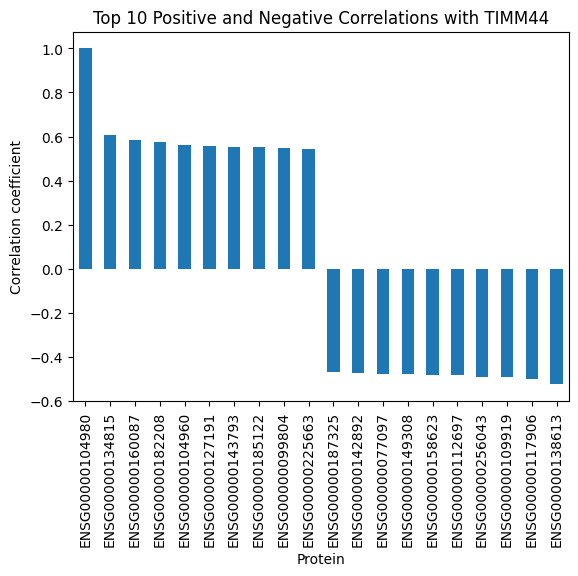

In [250]:
# Get top 10 positively correlated proteins
top_pos = correlations.head(10)

# Get top 10 negatively correlated proteins
top_neg = correlations.tail(10)

# Concatenate both into a single series
top_corr = pd.concat([top_pos, top_neg])

# Create a bar plot
top_corr.plot(kind='bar')
plt.title('Top 10 Positive and Negative Correlations with TIMM44')
plt.ylabel('Correlation coefficient')
plt.xlabel('Protein')
plt.show()


In [251]:
import lime
import lime.lime_tabular

# Create a Lime explainer object
explainer = lime.lime_tabular.LimeTabularExplainer(training_data = X_train.values, 
                                                   mode = 'classification',
                                                   training_labels = y_train,
                                                   feature_names = X_train.columns.tolist())

# Explain a prediction (an instance)
chosen_instance = X_test.values[0] 
exp = explainer.explain_instance(chosen_instance, model.predict_proba, num_features=5)

# Visualize the explanation
exp.show_in_notebook(show_table=True)


ModuleNotFoundError: No module named 'lime'